# Step 3 : Experiment II

---

## 1. Imports

In [1]:
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import math

In [3]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import random
import matplotlib.pyplot as plt #gráficos
import seaborn as sns

In [4]:
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
import joblib

In [5]:
from sklearn.ensemble import  RandomForestClassifier

---

## 2. Load the datasets

Let's load the **benign dataset** :

In [6]:
b1 = pd.read_csv(r"C:\Users\Usuario\Documents\Github\PDG\PDG-2\Datasets\Time Window\Originals\Benigns\BeningTimeWindowsStratosphere.csv", delimiter = ",")

In [7]:
b1.shape

(519, 31)

Let's load **our benign dataset**:

In [8]:
b2 = pd.read_csv(r"C:\Users\Usuario\Documents\Github\PDG\PDG-2\Datasets\Time Window\Originals\Benigns\BenignTimeWindowsOurLab.csv", delimiter = ",")

In [9]:
b2.shape

(649, 31)

Let's load the **malign train** :

In [10]:
m = pd.read_csv(r"C:\Users\Usuario\Documents\Github\PDG\PDG-2\Datasets\Time Window\Originals\Maligns\MalignTimeWindowsStratosphere.csv", delimiter = ",")

In [11]:
m.shape

(258178, 31)

Let's create a **sample**:

In [12]:
m = m.sample(n=1200)
m.shape

(1200, 31)

Let's join both datasets:

In [13]:
frames = [b1,b2,m]
dataframe = pd.concat(frames)

In [14]:
dataframe.head()

,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,max_d,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,1-csves/0.csv,7846,UDP,TCP,NaN,0.0,0.0,9.971,170718.308,291.654,...,53,80.0,443.0,1.0,1.0,8.0,52.0,210.0,494.0,Benign
1,1-csves/1.csv,10044,UDP,TCP,ICMP,0.0,0.0,7.072,144468.294,291.495,...,53,443.0,80.0,1.0,1.0,4.0,49.0,155.0,430.0,Benign
2,1-csves/2.csv,7852,UDP,TCP,NaN,0.0,0.0,16.452,186441.984,296.048,...,53,80.0,443.0,1.0,1.0,10.0,52.0,211.0,634.0,Benign
3,1-csves/3.csv,5380,UDP,TCP,ICMP,0.0,0.0,7.917,99154.208,291.025,...,53,443.0,80.0,1.0,1.0,7.0,52.0,193.0,435.0,Benign
4,1-csves/4.csv,6660,UDP,TCP,ICMP,0.0,0.0,8.056,134871.434,291.589,...,53,80.0,443.0,1.0,1.0,6.0,51.0,199.0,434.0,Benign


In [15]:
dataframe.shape

(2368, 31)

In [16]:
dataframe = dataframe.sample(frac=1)

---

## 3. Let's see the dataset...

In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 171092 to 231292
Data columns (total 31 columns):
Name               2368 non-null object
Netflows           2368 non-null int64
First_Protocol     1453 non-null object
Second_Protocol    2201 non-null object
Third_Protocol     1652 non-null object
p1_d               2368 non-null float64
p2_d               2368 non-null float64
p3_d               2368 non-null float64
duration           2368 non-null float64
max_d              2368 non-null float64
min_d              2368 non-null float64
packets            2368 non-null int64
Avg_bps            2368 non-null int64
Avg_pps            2368 non-null int64
Avg_bpp            2368 non-null int64
Bytes              2368 non-null int64
number_sp          2368 non-null int64
number_dp          2368 non-null int64
first_sp           2368 non-null int64
second_sp          2137 non-null float64
third_sp           2043 non-null float64
first_dp           2368 non-null int64
second_d

In [18]:
dataframe.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,2368,2361,8-csves/0.csv,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Netflows,2368,NaN,NaN,NaN,974.219,2609.09,2,173.75,260,438.25,43128
First_Protocol,1453,4,UDP,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Second_Protocol,2201,5,TCP,1062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Third_Protocol,1652,6,IGMP,837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p1_d,2368,NaN,NaN,NaN,0.172959,2.29056,0,0,0,0,37.5075
p2_d,2368,NaN,NaN,NaN,0.909064,9.41218,0,0,0,0.00175,135.783
p3_d,2368,NaN,NaN,NaN,10.7808,30.6391,0,0,0.103,6.23013,271.566
duration,2368,NaN,NaN,NaN,15405.1,37291,0,37.8085,1040.5,10795.6,302504
max_d,2368,NaN,NaN,NaN,164.306,128.437,0,4.9955,150.545,291.178,509.799


In [19]:
null_counts = dataframe.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Name                 0
Netflows             0
First_Protocol     915
Second_Protocol    167
Third_Protocol     716
p1_d                 0
p2_d                 0
p3_d                 0
duration             0
max_d                0
min_d                0
packets              0
Avg_bps              0
Avg_pps              0
Avg_bpp              0
Bytes                0
number_sp            0
number_dp            0
first_sp             0
second_sp          231
third_sp           325
first_dp             0
second_dp           34
third_dp           152
p1_ip                0
p2_ip                0
p3_ip                0
p1_ib                0
p2_ib                0
p3_ib                0
Type                 0
dtype: int64


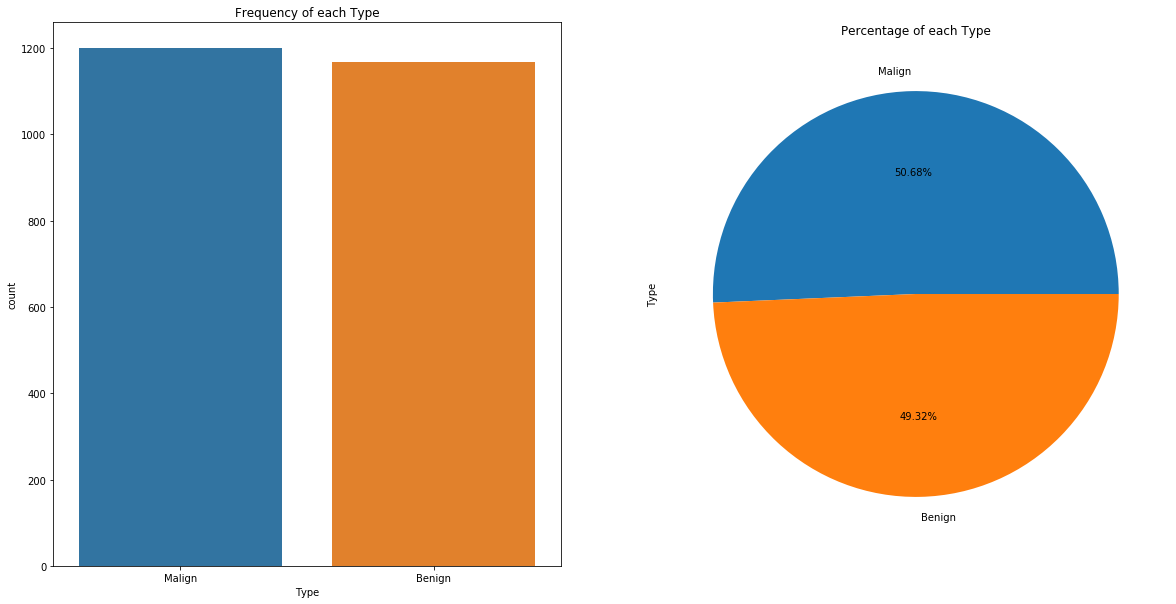

In [20]:
fig, axs = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='Type',data=dataframe,ax=axs[0])
axs[0].set_title("Frequency of each Type")
dataframe.Type.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Type")
plt.show()

---

## 4. EDA

### 4.1 Remove NaNs

In [21]:
dataframe.columns

Index(['Name', 'Netflows', 'First_Protocol', 'Second_Protocol',
       'Third_Protocol', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       'packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', 'Bytes', 'number_sp',
       'number_dp', 'first_sp', 'second_sp', 'third_sp', 'first_dp',
       'second_dp', 'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib',
       'p3_ib', 'Type'],
      dtype='object')

In [22]:
dataframe['First_Protocol'] = dataframe['First_Protocol'].replace(np.nan,"None",regex=True)
dataframe['Second_Protocol'] = dataframe['Second_Protocol'].replace(np.nan,"None",regex=True)
dataframe['Third_Protocol'] = dataframe['Third_Protocol'].replace(np.nan,"None",regex=True)

In [23]:
dataframe['second_sp'] = dataframe['second_sp'].replace(np.nan,-1,regex=True)
dataframe['third_sp'] = dataframe['third_sp'].replace(np.nan,-1,regex=True)

In [24]:
dataframe['second_dp'] = dataframe['second_dp'].replace(np.nan,-1,regex=True)
dataframe['third_dp'] = dataframe['third_dp'].replace(np.nan,-1,regex=True)

In [25]:
null_counts = dataframe.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Name               0
Netflows           0
First_Protocol     0
Second_Protocol    0
Third_Protocol     0
p1_d               0
p2_d               0
p3_d               0
duration           0
max_d              0
min_d              0
packets            0
Avg_bps            0
Avg_pps            0
Avg_bpp            0
Bytes              0
number_sp          0
number_dp          0
first_sp           0
second_sp          0
third_sp           0
first_dp           0
second_dp          0
third_dp           0
p1_ip              0
p2_ip              0
p3_ip              0
p1_ib              0
p2_ib              0
p3_ib              0
Type               0
dtype: int64


### 4.2 Changing Dtypes

Columns like :

   1. second_sp
   2. third_sp
   3. second_dp
   4. third_dp

Have to be **INTEGER** because they are **PORTS**

In [26]:
dataframe['second_sp'] = dataframe['second_sp'].astype(np.int64)
dataframe['third_sp'] = dataframe['third_sp'].astype(np.int64)

In [27]:
dataframe['second_dp'] = dataframe['second_dp'].astype(np.int64)
dataframe['third_dp'] = dataframe['third_dp'].astype(np.int64)

In [28]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 171092 to 231292
Data columns (total 31 columns):
Name               2368 non-null object
Netflows           2368 non-null int64
First_Protocol     2368 non-null object
Second_Protocol    2368 non-null object
Third_Protocol     2368 non-null object
p1_d               2368 non-null float64
p2_d               2368 non-null float64
p3_d               2368 non-null float64
duration           2368 non-null float64
max_d              2368 non-null float64
min_d              2368 non-null float64
packets            2368 non-null int64
Avg_bps            2368 non-null int64
Avg_pps            2368 non-null int64
Avg_bpp            2368 non-null int64
Bytes              2368 non-null int64
number_sp          2368 non-null int64
number_dp          2368 non-null int64
first_sp           2368 non-null int64
second_sp          2368 non-null int64
third_sp           2368 non-null int64
first_dp           2368 non-null int64
second_dp   

### 4.3  Drop Innnecesary Columns...

Let's verify if there are columns that have less than 4 values in the column's values

In [29]:
for col in dataframe.columns:
    if (len(dataframe[col].unique()) < 4):
        print(dataframe[col].value_counts())
        print()

Malign    1200
Benign    1168
Name: Type, dtype: int64



Obviously, the column **Type** can't be delete because it's the **TARGET**

---

### 4.4. Let's create the Dictionary

In [30]:
le = preprocessing.LabelEncoder()

#### 4.4.1 First_Protocol var

In [31]:
dataframe.First_Protocol.unique()

array(['None', 'UDP', 'TCP', 'ICMP6', 'ICMP'], dtype=object)

In [32]:
first_protocol_column_codified = le.fit_transform(dataframe.First_Protocol)

In [33]:
le_name_mapping_first_protocol = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping_first_protocol)

{'ICMP': 0, 'ICMP6': 1, 'None': 2, 'TCP': 3, 'UDP': 4}


In [34]:
dataframe.First_Protocol = le.fit_transform(dataframe.First_Protocol)

In [35]:
joblib.dump(le, './Tools/label_encoder_first_protocol_exp2.encoder')

['./Tools/label_encoder_first_protocol_exp2.encoder']

#### 4.4.2 Second_Protocol var

In [36]:
dataframe.Second_Protocol.unique()

array(['ICMP6', 'IGMP', 'TCP', 'UDP', 'None', 'ICMP'], dtype=object)

In [37]:
second_protocol_column_codified = le.fit_transform(dataframe.Second_Protocol)

In [38]:
le_name_mapping_second_protocol = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping_second_protocol)

{'ICMP': 0, 'ICMP6': 1, 'IGMP': 2, 'None': 3, 'TCP': 4, 'UDP': 5}


In [39]:
dataframe.Second_Protocol = le.fit_transform(dataframe.Second_Protocol)

In [40]:
joblib.dump(le, './Tools/label_encoder_second_protocol_exp2.encoder')

['./Tools/label_encoder_second_protocol_exp2.encoder']

#### 4.4.3 Third_Protocol var

In [41]:
dataframe.Third_Protocol.unique()

array(['IGMP', 'ICMP', 'TCP', 'ICMP6', 'None', 'UDP', '139'], dtype=object)

In [42]:
third_protocol_column_codified = le.fit_transform(dataframe.Third_Protocol)

In [43]:
le_name_mapping_third_protocol = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping_third_protocol)

{'139': 0, 'ICMP': 1, 'ICMP6': 2, 'IGMP': 3, 'None': 4, 'TCP': 5, 'UDP': 6}


In [44]:
dataframe.Third_Protocol = le.fit_transform(dataframe.Third_Protocol)

In [45]:
joblib.dump(le, './Tools/label_encoder_third_protocol_exp2.encoder')

['./Tools/label_encoder_third_protocol_exp2.encoder']

#### 4.4.4 Type

In [46]:
dataframe.Type.unique()

array(['Malign', 'Benign'], dtype=object)

In [47]:
Type_protocol_column_codified = le.fit_transform(dataframe.Type)

In [48]:
le_name_mapping_type = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping_type)

{'Benign': 0, 'Malign': 1}


In [49]:
dataframe.Type = le.fit_transform(dataframe.Type)

In [50]:
joblib.dump(le, './Tools/label_encoder_type_exp2.encoder')

['./Tools/label_encoder_type_exp2.encoder']

---

### 4.5 Let's see the outliers...

In [51]:
dataframe.columns

Index(['Name', 'Netflows', 'First_Protocol', 'Second_Protocol',
       'Third_Protocol', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       'packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', 'Bytes', 'number_sp',
       'number_dp', 'first_sp', 'second_sp', 'third_sp', 'first_dp',
       'second_dp', 'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib',
       'p3_ib', 'Type'],
      dtype='object')

In [52]:
invalid = ["Name","First_Protocol","Second_Protocol","Third_Protocol","Type"]

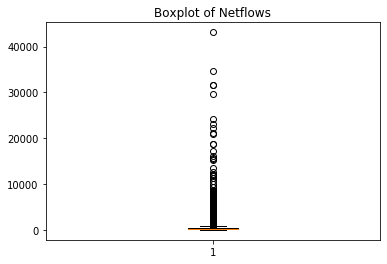

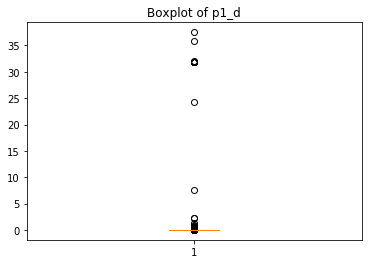

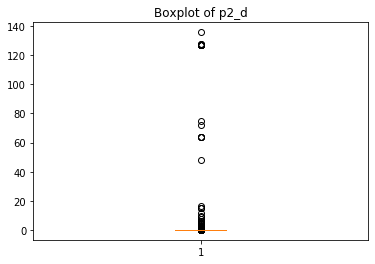

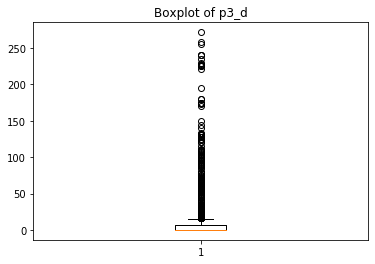

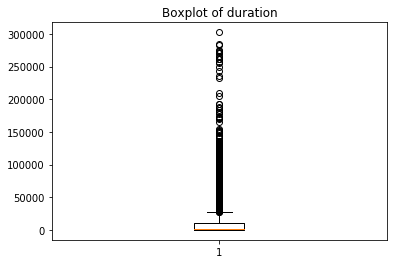

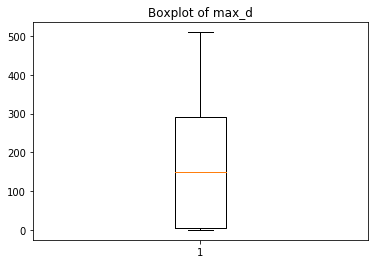

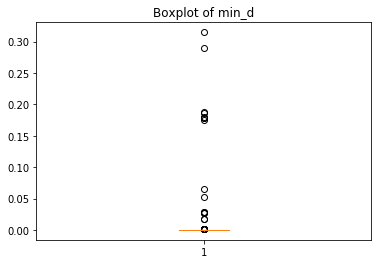

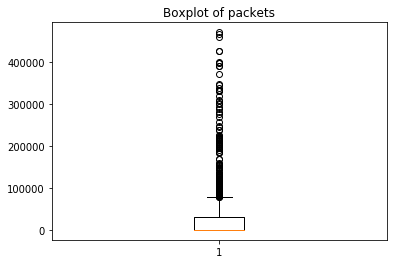

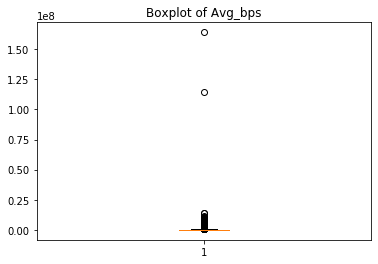

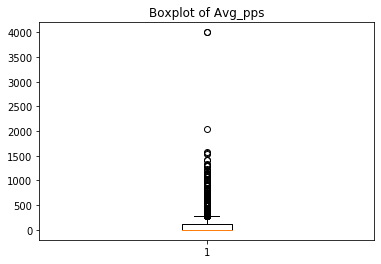

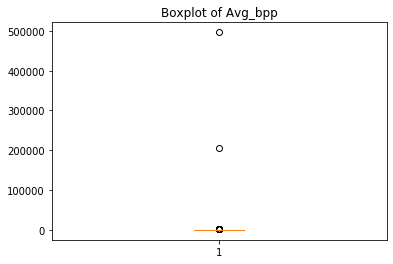

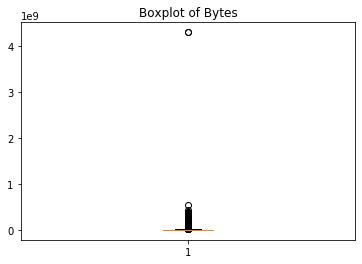

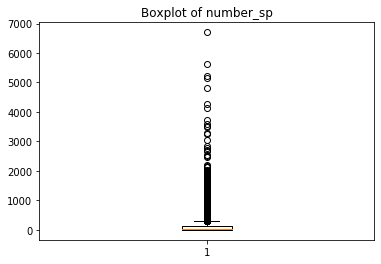

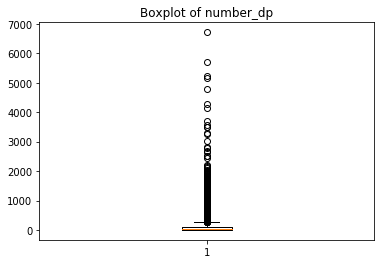

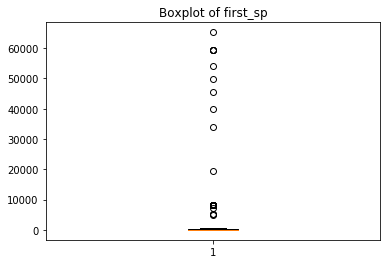

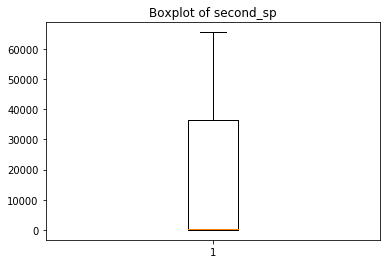

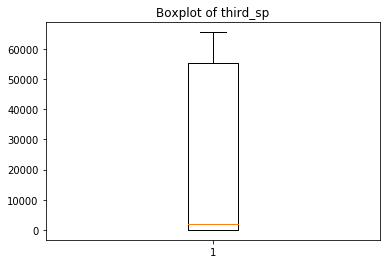

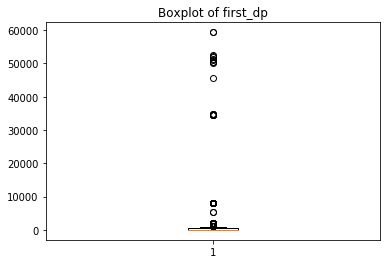

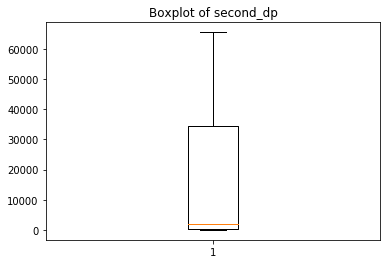

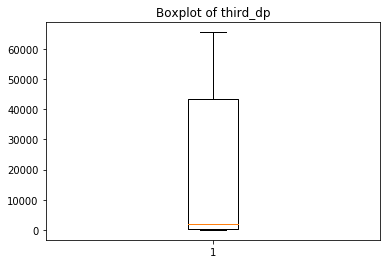

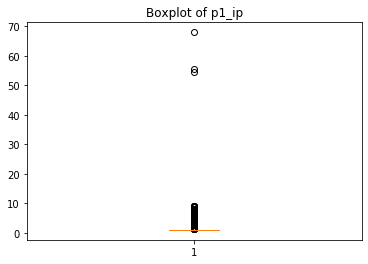

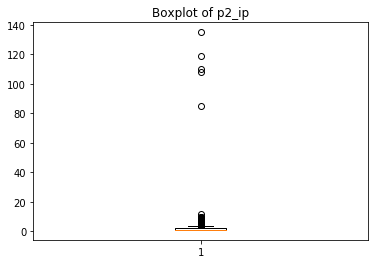

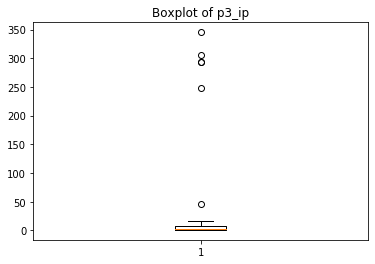

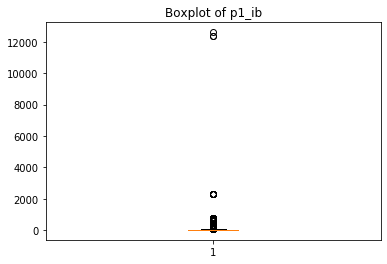

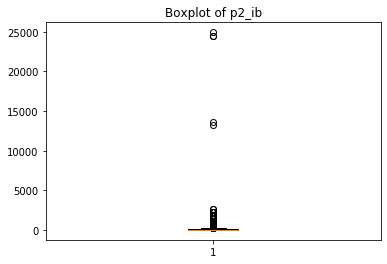

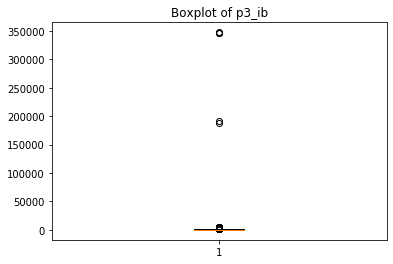

In [53]:
for column in dataframe.columns:  
    if column not in invalid:
        fig = plt.figure()
        ax = plt.subplot()
        ax.set_title("Boxplot of %s" %column)
        ax.boxplot(dataframe[column])

---

In [54]:
invalid = ['Name', 'First_Protocol', 'Second_Protocol',
       'Third_Protocol','first_sp', 'second_sp', 'third_sp', 'first_dp',
       'second_dp', 'third_dp','Type']

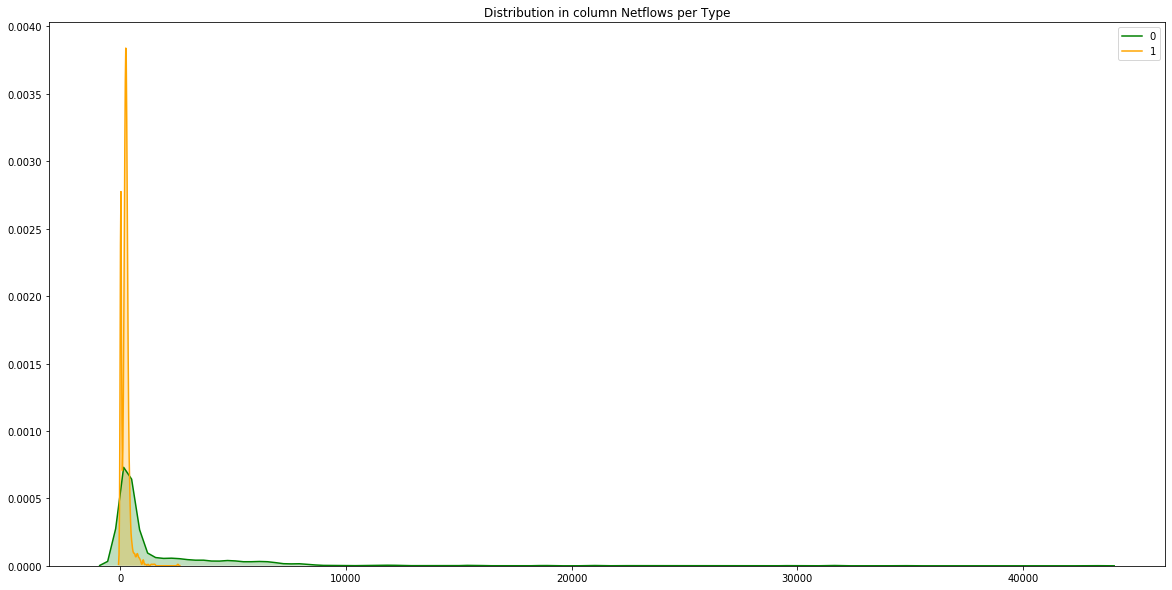

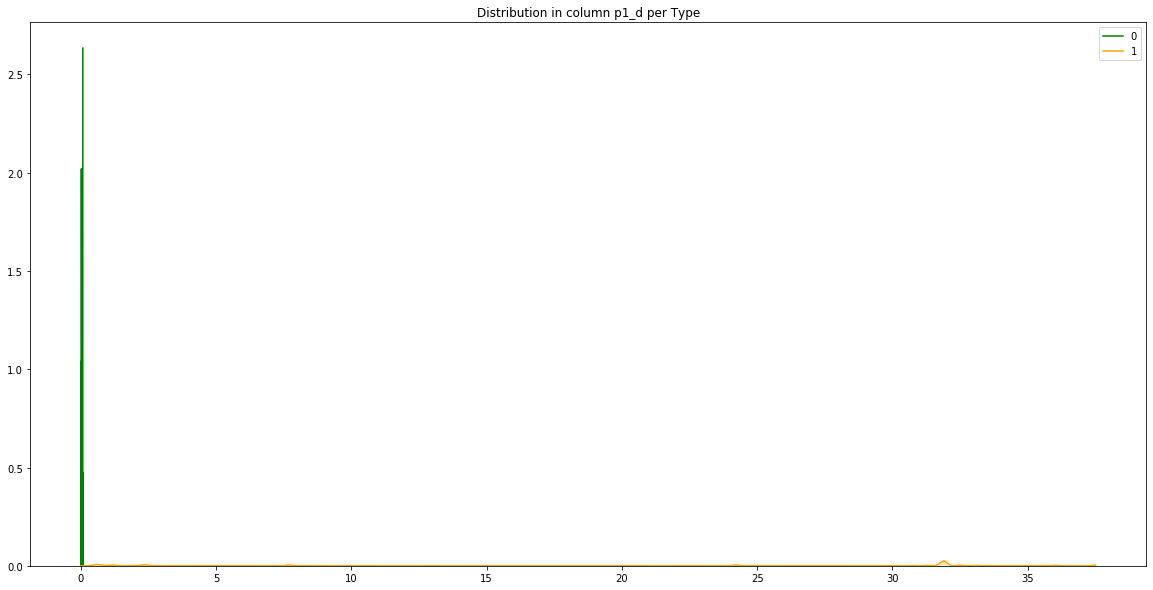

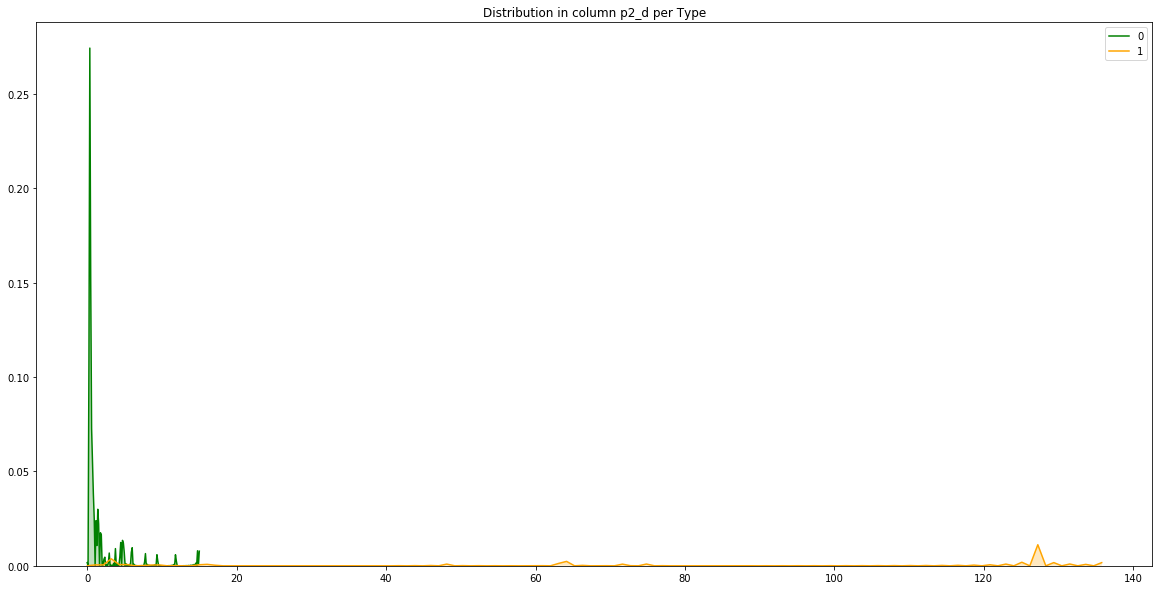

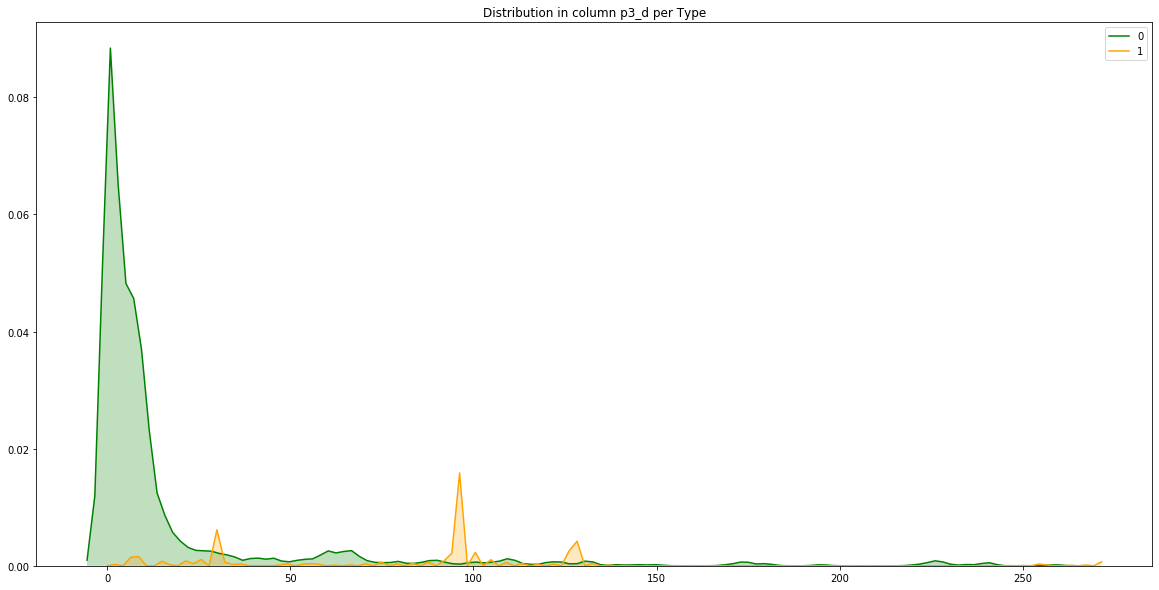

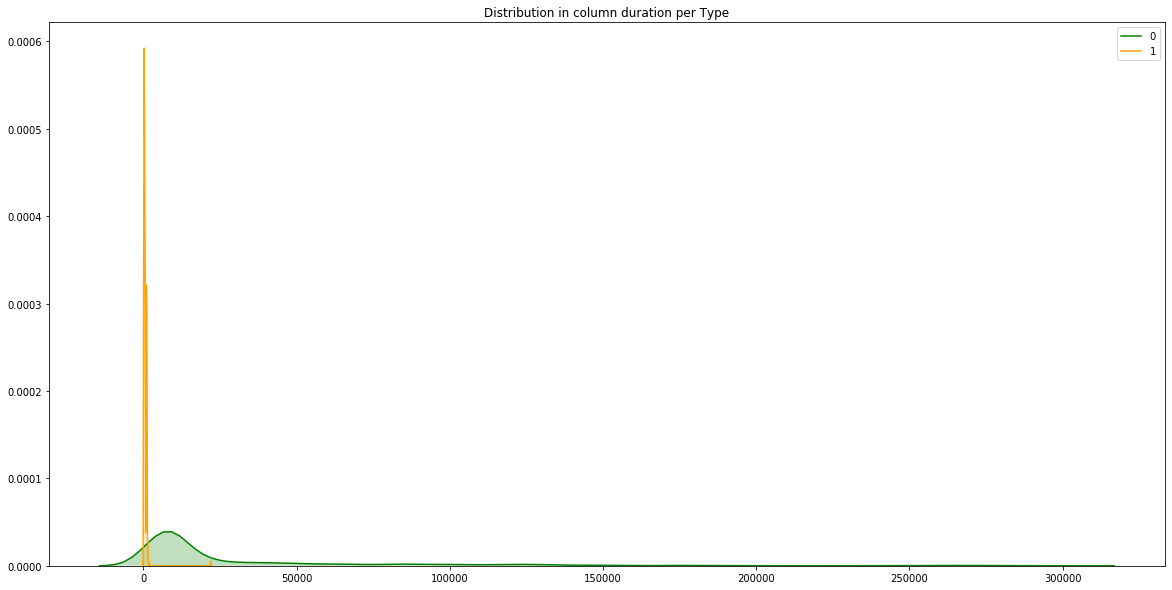

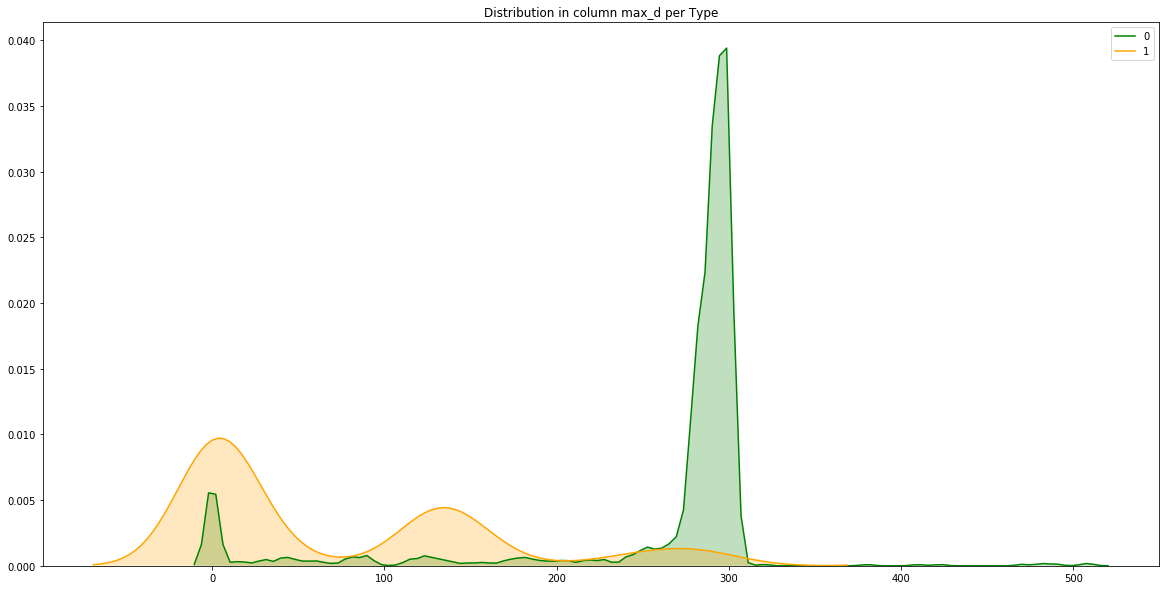

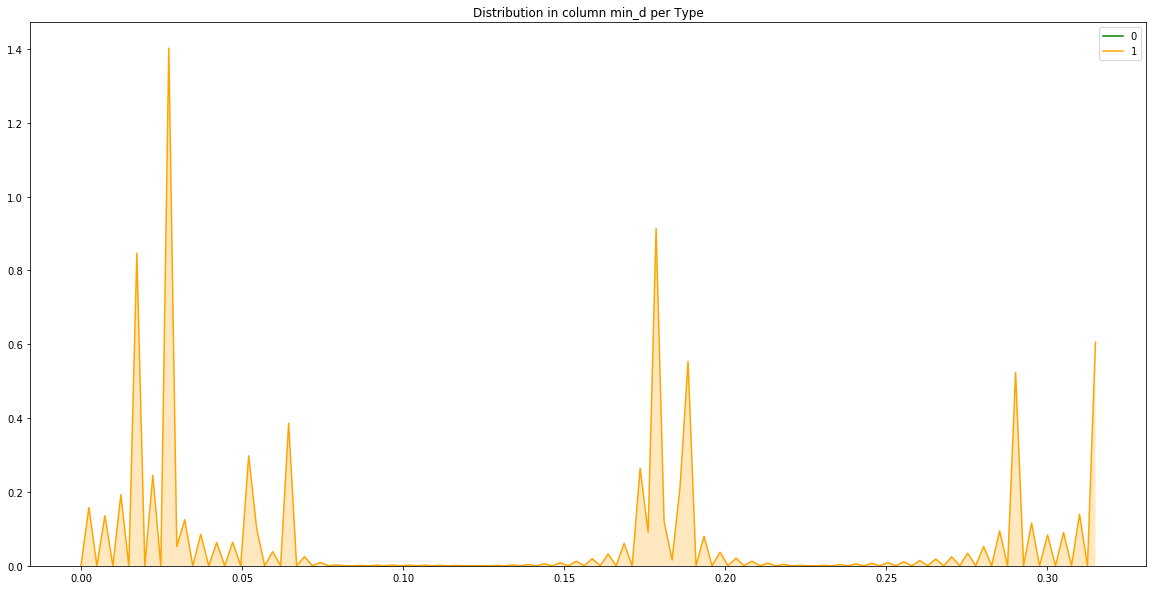

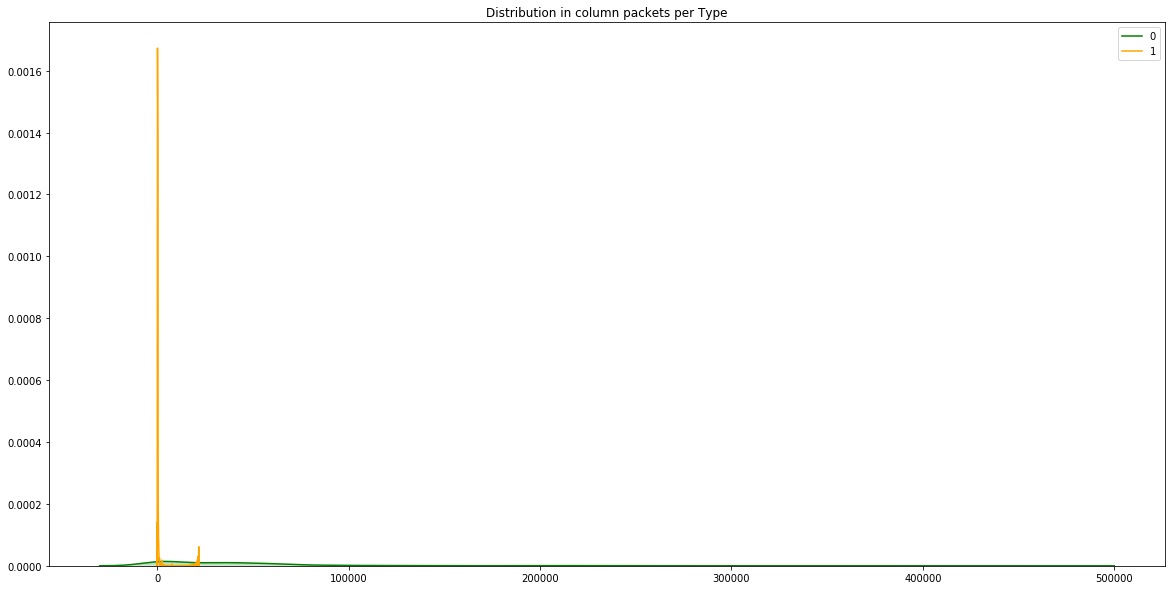

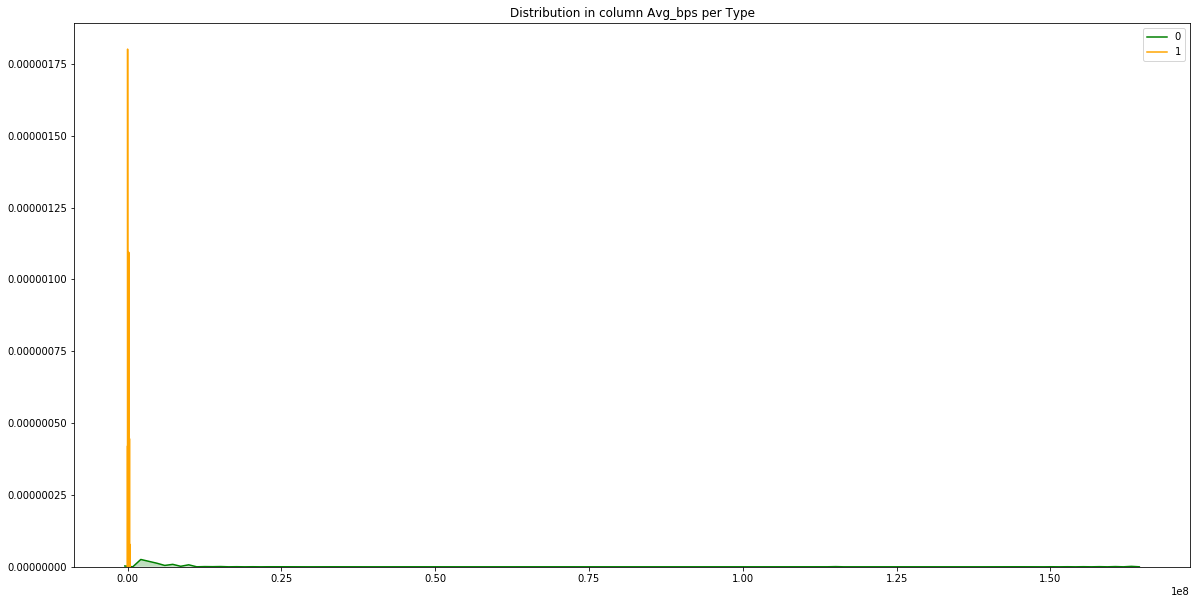

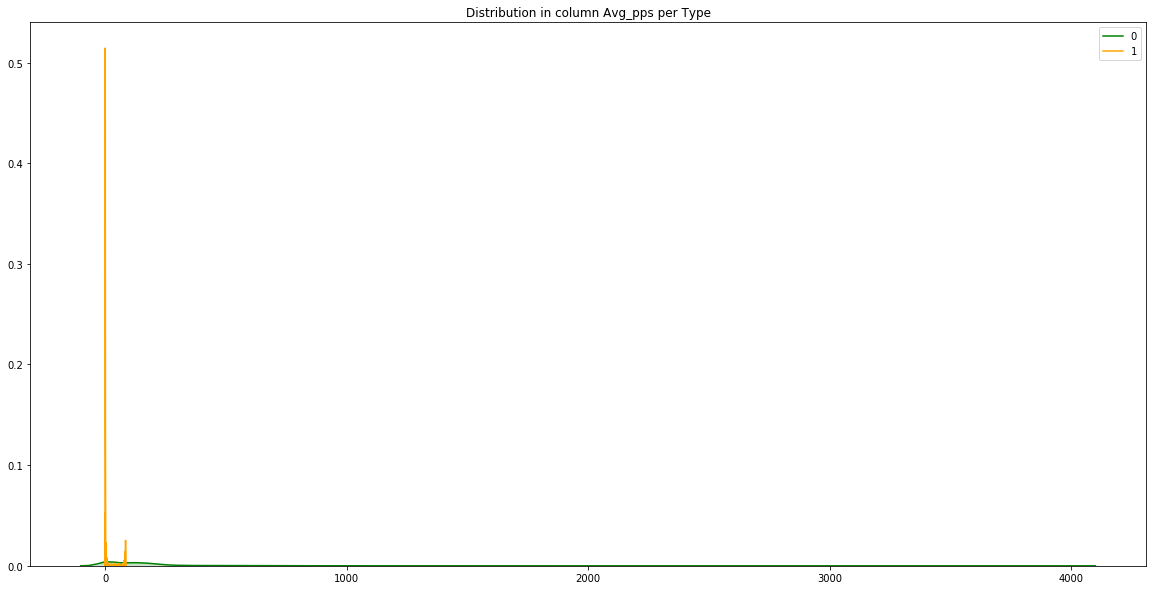

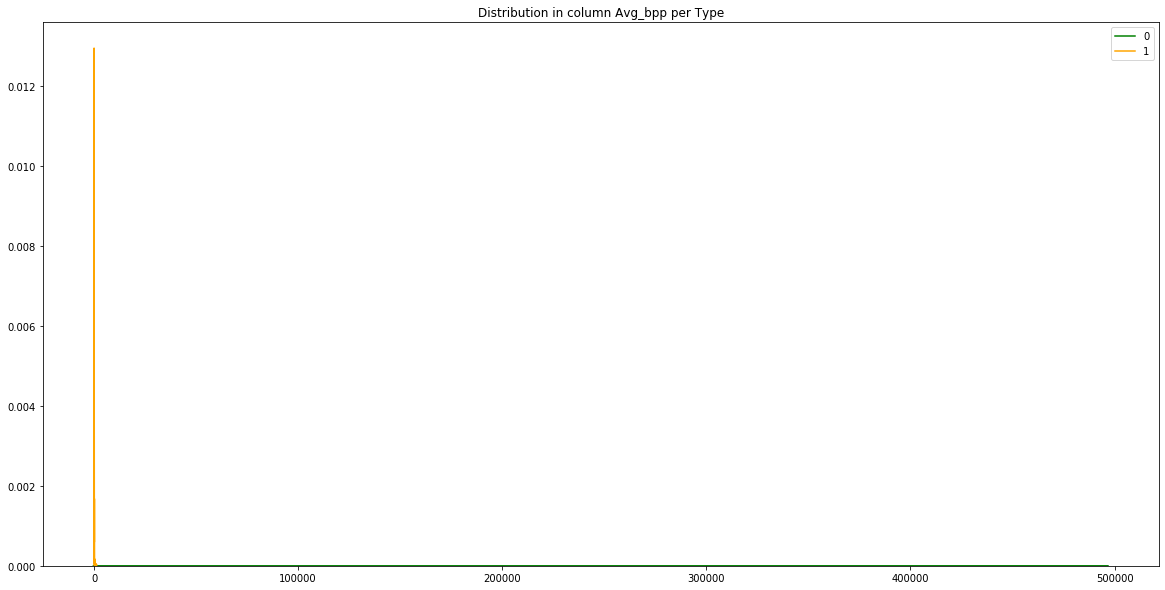

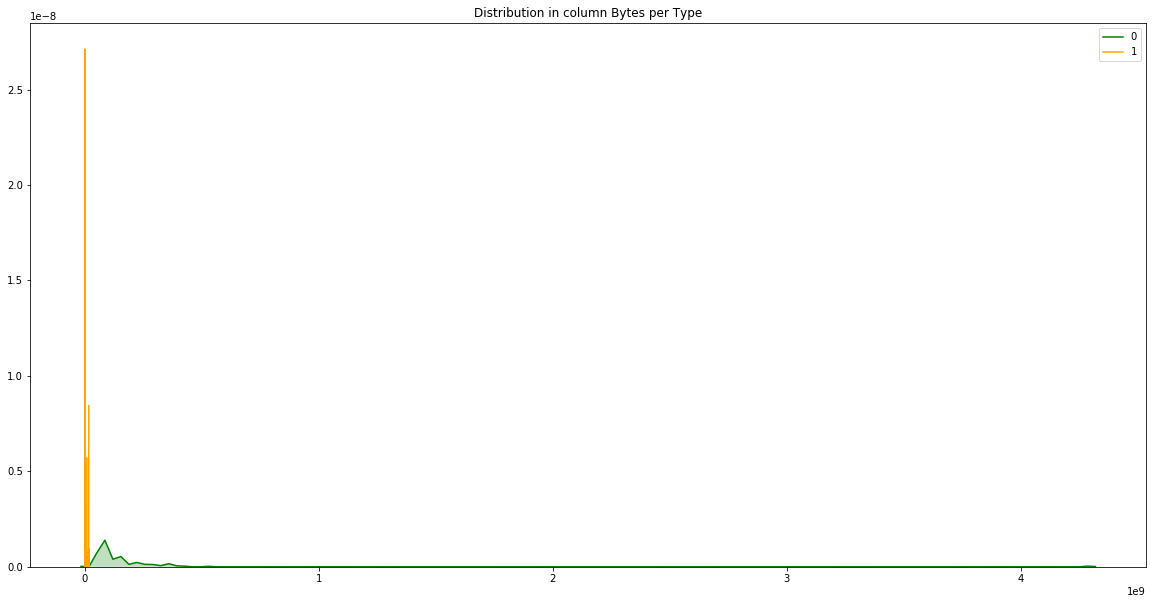

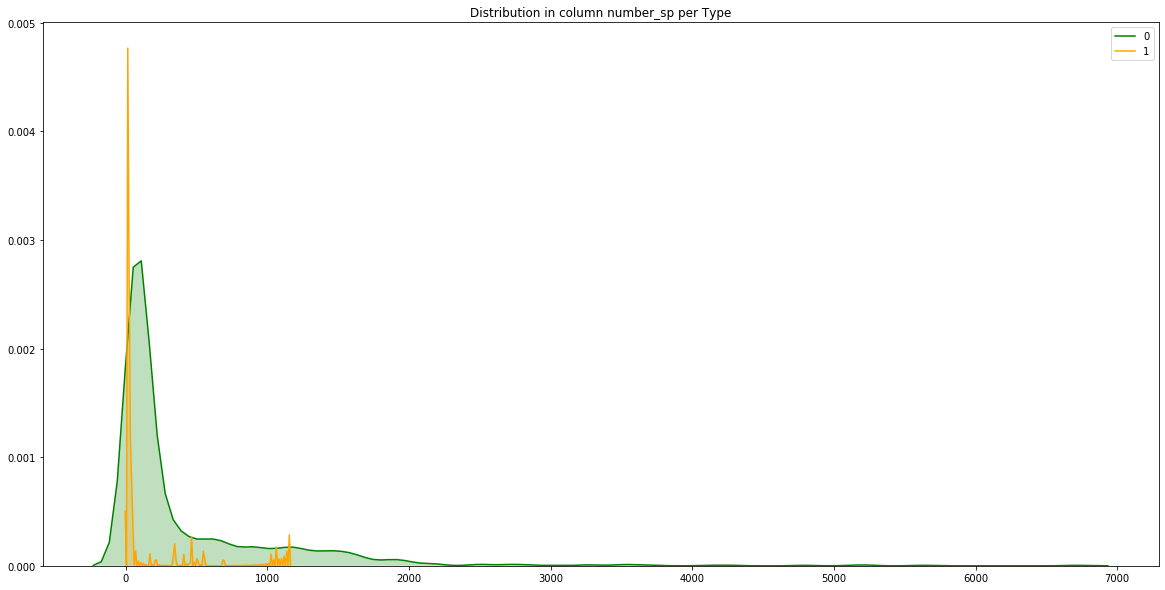

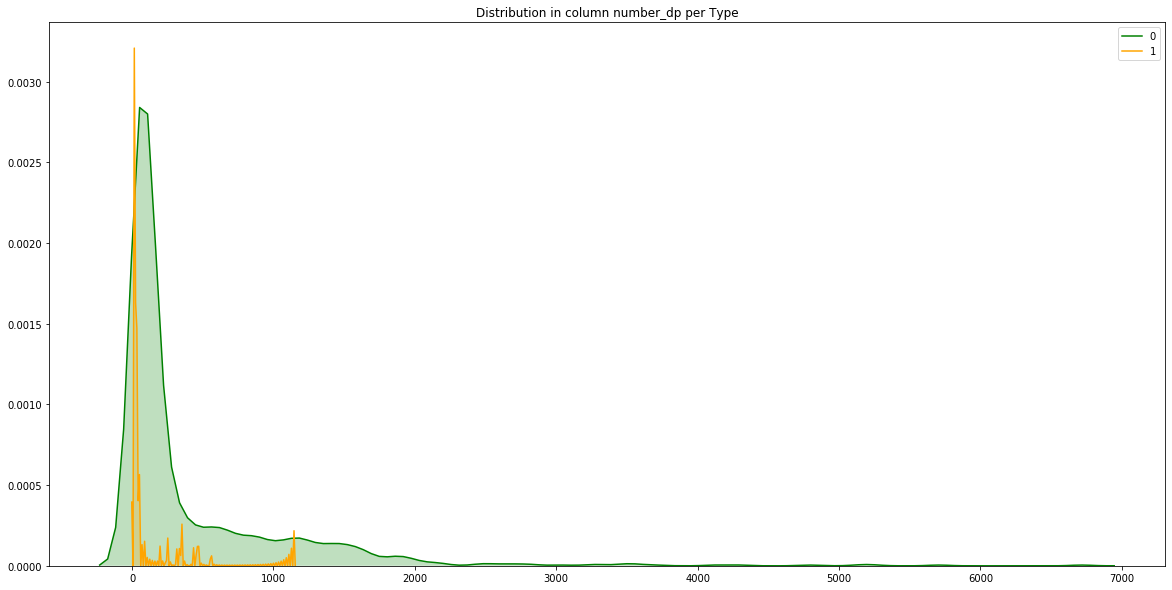

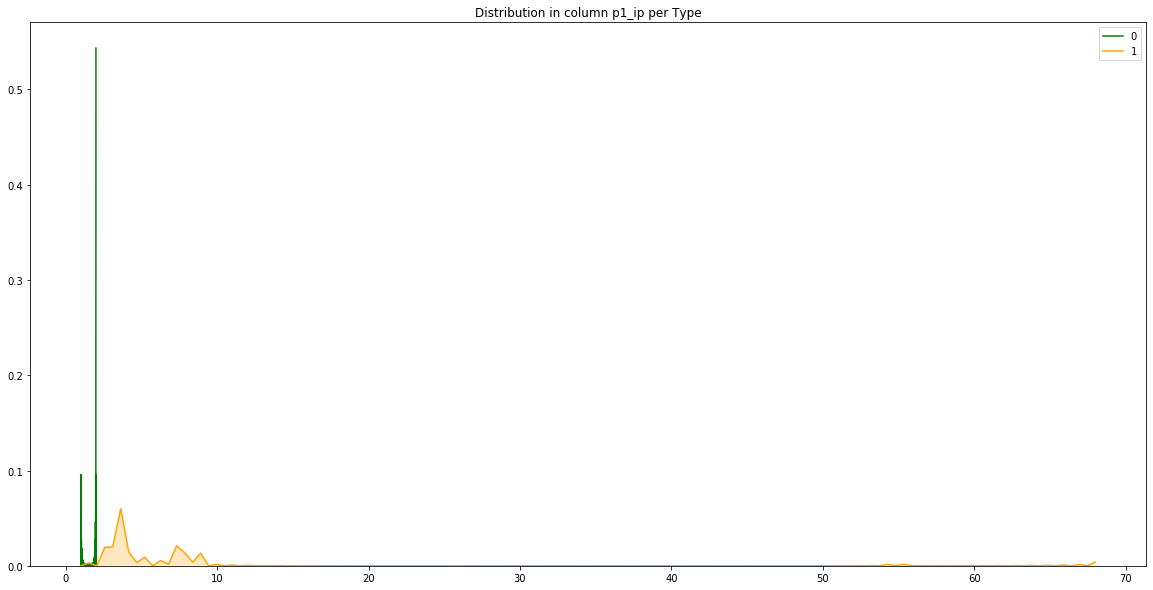

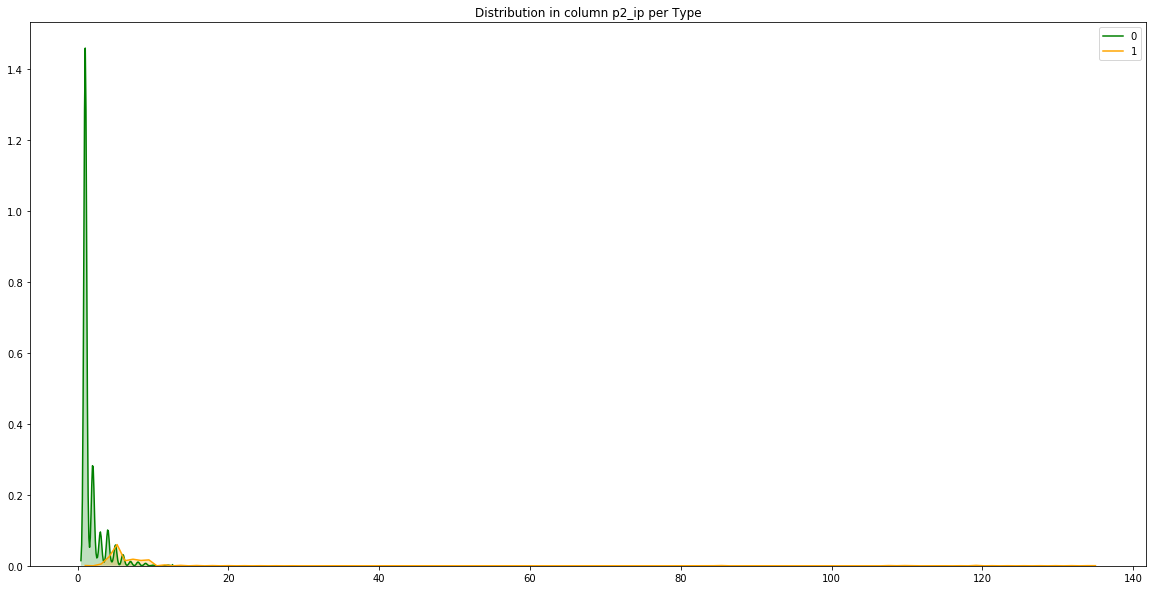

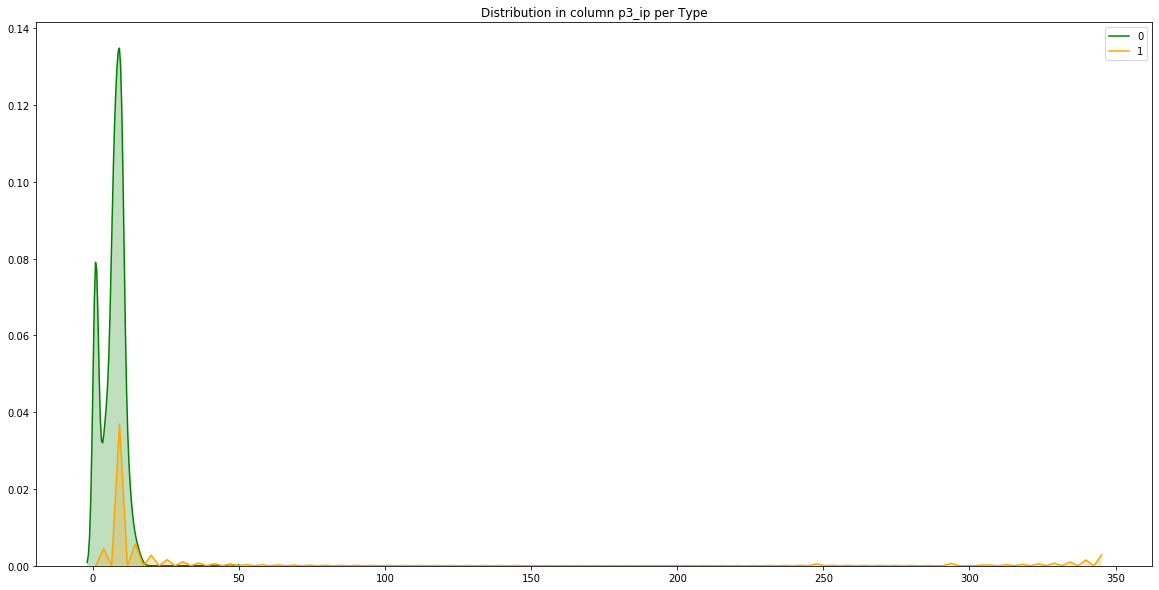

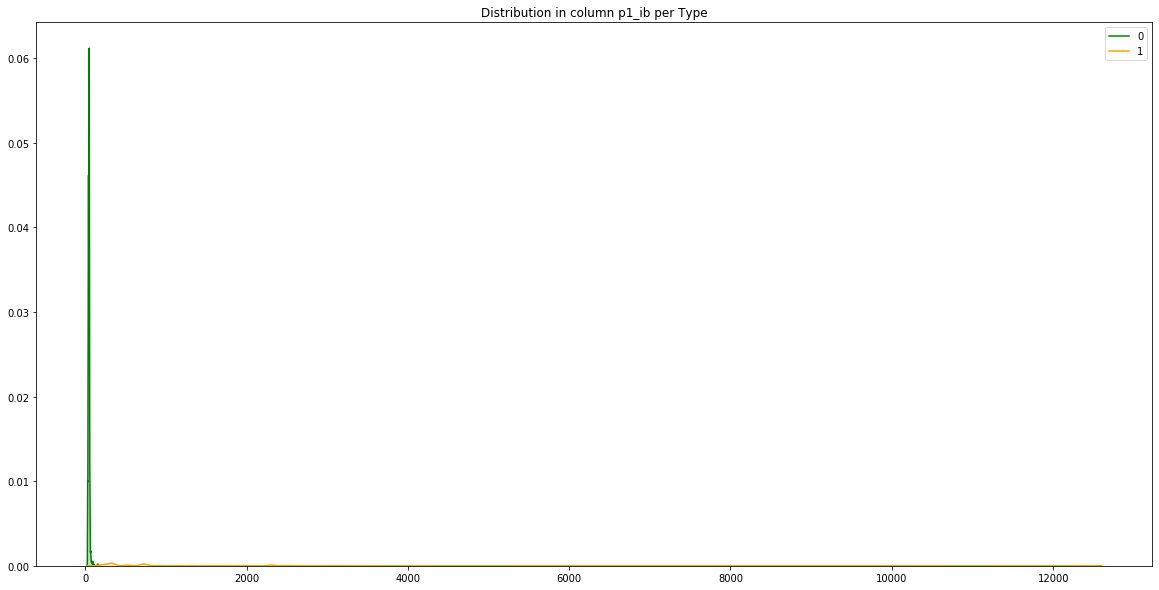

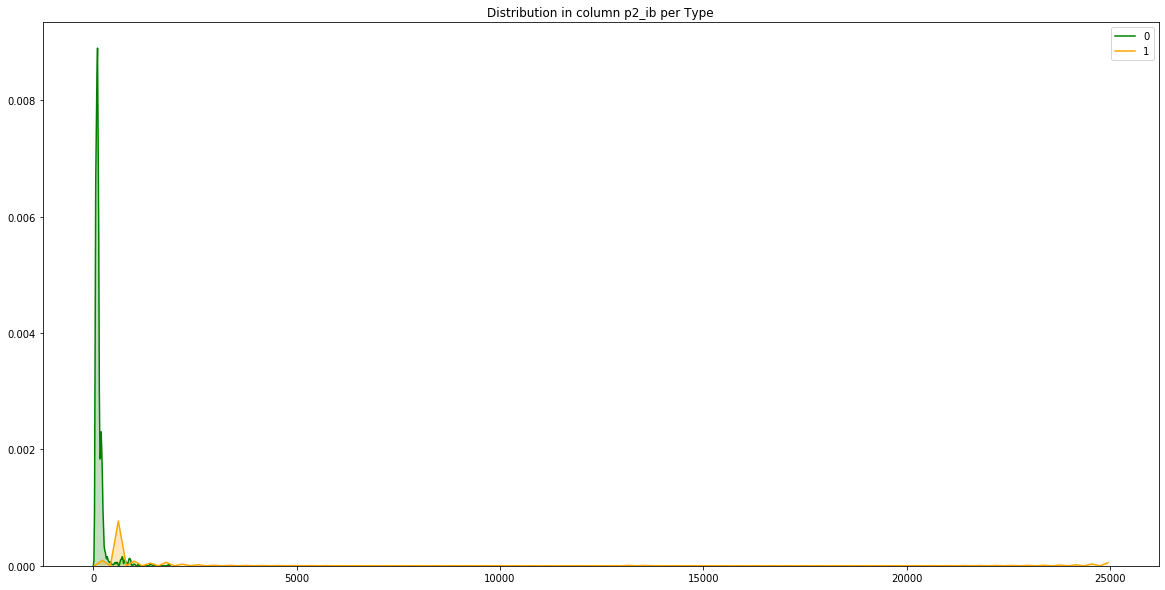

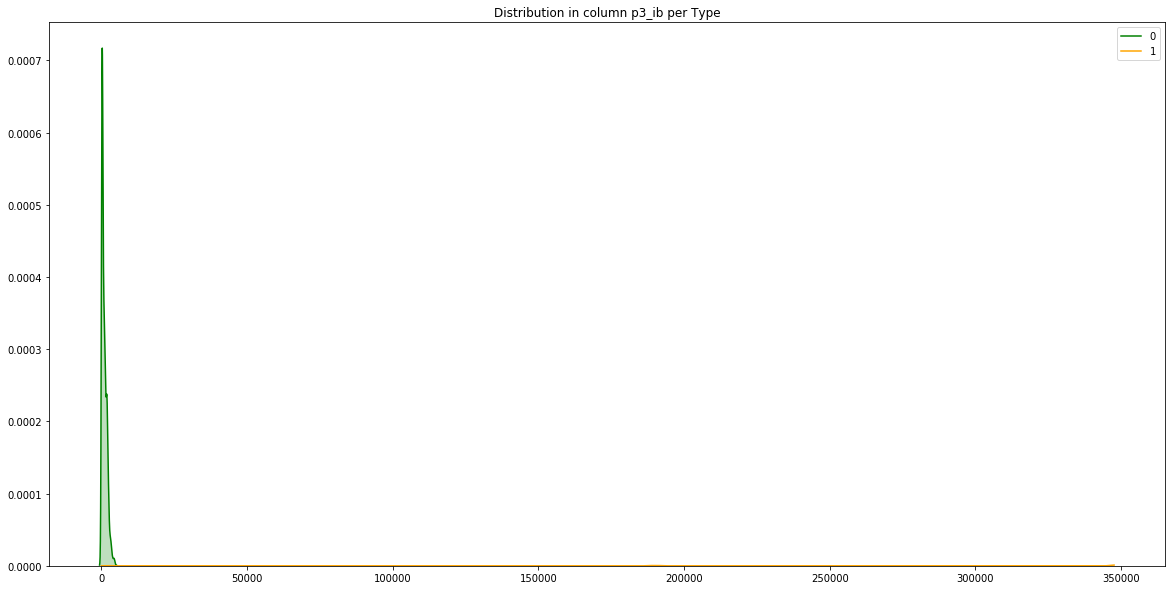

In [55]:
for column in dataframe.columns:  
    if column not in invalid:
        fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
        ax1.set_title("Distribution in column %s per Type" %column)
        sns.kdeplot(dataframe[dataframe.Type == 0][column], color="green", shade=True)
        sns.kdeplot(dataframe[dataframe.Type == 1][column], color="orange", shade=True)
        plt.legend(['0', '1'])

---

#### 4.5.1 Avg_bps var

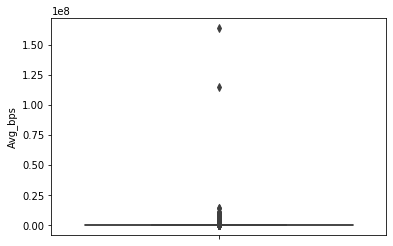

In [56]:
sns.boxplot(y=dataframe["Avg_bps"])

In [57]:
values = dataframe.iloc[dataframe['Avg_bps'].argsort()[-4:]]
values = values[['Avg_bps','Name']]
print(values)

       Avg_bps             Name
440   14222873   15-csves/1.csv
6     14377340   20-csves/1.csv
71   114767825  25-csves/12.csv
502  164005202  39-csves/28.csv


In [58]:
dataframe=dataframe[dataframe.Avg_bps<114767825]

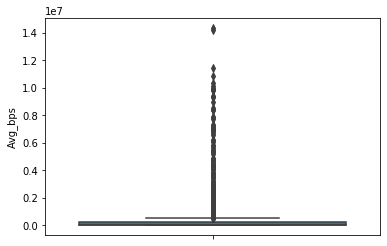

In [59]:
sns.boxplot(y=dataframe["Avg_bps"])

#### 4.5.2 p1_ip var

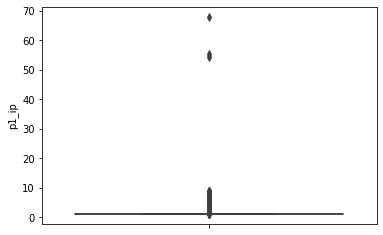

In [60]:
sns.boxplot(y=dataframe["p1_ip"])

In [61]:
values = dataframe.iloc[dataframe['p1_ip'].argsort()[-4:]]
values = values[['p1_ip','Name']]
print(values)

        p1_ip               Name
138622    9.0  66-csves/2426.csv
205603   54.5   75-csves/142.csv
80476    55.5  75-csves/1500.csv
37496    68.0   75-csves/215.csv


In [62]:
dataframe=dataframe[dataframe.p1_ip<71]

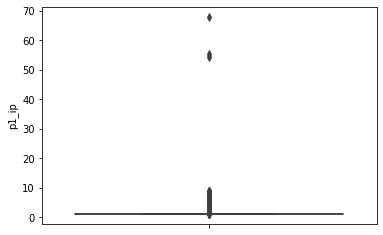

In [63]:
sns.boxplot(y=dataframe["p1_ip"])

---

---

To plot the most important vars , we have to keep the real values:

In [64]:
dataframe_copy = dataframe.copy()

---

## 5. Let's Standardize the dataset...

In [65]:
names = dataframe.Name
dataframe = dataframe.drop(['Name'], axis=1)

In [66]:
scaler = preprocessing.RobustScaler()

In [67]:
dataframe.columns

Index(['Netflows', 'First_Protocol', 'Second_Protocol', 'Third_Protocol',
       'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', 'packets',
       'Avg_bps', 'Avg_pps', 'Avg_bpp', 'Bytes', 'number_sp', 'number_dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'Type'],
      dtype='object')

In [68]:
dataframe

,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,max_d,min_d,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
171092,236,2,1,3,0.0000,0.000,0.000,0.000,0.000,0.0,...,0,34560,-1,1.0,1.0,1.0,32.0,32.0,32.00,1
223147,136,2,2,1,0.0000,0.000,0.000,8.084,3.354,0.0,...,0,1281,34304,1.0,1.0,1.0,32.0,32.0,32.00,1
392,291,4,4,1,0.0000,0.000,0.892,10962.396,299.995,0.0,...,2048,443,1900,1.0,1.0,5.5,40.0,69.0,399.00,0
209588,296,2,1,5,0.0000,0.000,0.000,617.280,131.073,0.0,...,0,34560,1281,1.0,1.0,1.0,32.0,32.0,32.00,1
253579,192,2,5,3,0.0000,0.000,0.000,12.010,3.003,0.0,...,0,52985,52986,1.0,1.0,1.0,32.0,32.0,32.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,304,4,4,4,0.0000,0.000,0.000,3155.274,290.194,0.0,...,53,443,56066,1.0,1.0,1.0,42.0,57.0,192.00,0
44736,253,2,2,2,0.0000,0.000,0.000,5.500,2.964,0.0,...,0,34560,547,1.0,1.0,1.0,32.0,32.0,32.00,1
254260,346,2,4,3,0.0000,0.000,0.001,22.456,3.002,0.0,...,0,443,34560,1.0,1.0,3.0,32.0,32.0,162.00,1
516,680,4,3,4,0.0000,0.000,0.000,0.000,0.000,0.0,...,53,49661,45450,1.0,1.0,1.0,45.0,63.0,102.75,0


In [69]:
dataframe[['Netflows', 
       'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', 'packets',
       'Avg_bps', 'Avg_pps', 'Avg_bpp', 'Bytes', 'number_sp', 'number_dp',
        'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib']] = scaler.fit_transform(dataframe[['Netflows', 
       'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', 'packets',
       'Avg_bps', 'Avg_pps', 'Avg_bpp', 'Bytes', 'number_sp', 'number_dp',
        'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib'
]])

In [70]:
dataframe.shape

(2366, 30)

In [71]:
dataframe.head()

,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,max_d,min_d,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
171092,-0.090652,2,1,3,0.0,0.0,-0.015401,-0.096696,-0.525955,0.0,...,0,34560,-1,0.0,0.0,-0.285714,-0.444444,-0.398058,-0.234614,1
223147,-0.468366,2,2,1,0.0,0.0,-0.015401,-0.095944,-0.514238,0.0,...,0,1281,34304,0.0,0.0,-0.285714,-0.444444,-0.398058,-0.234614,1
392,0.117092,4,4,1,0.0,0.0,0.127890,0.923000,0.522130,0.0,...,2048,443,1900,0.0,0.0,0.357143,0.000000,-0.038835,0.160355,0
209588,0.135977,2,1,5,0.0,0.0,-0.015401,-0.039278,-0.068029,0.0,...,0,34560,1281,0.0,0.0,-0.285714,-0.444444,-0.398058,-0.234614,1
253579,-0.256846,2,5,3,0.0,0.0,-0.015401,-0.095579,-0.515464,0.0,...,0,52985,52986,0.0,0.0,-0.285714,-0.444444,-0.398058,-0.234614,1


---

## 5.  ::::::: FEATURE IMPORTANCE ::::::::

In [72]:
clf=RandomForestClassifier(n_estimators =10, random_state = 1234, class_weight="balanced")

In [73]:
X = dataframe.iloc[:,:-1]
y = dataframe.Type

In [74]:
output = cross_validate(clf, X, y, cv=20, scoring = 'accuracy', return_estimator =True)

In [75]:
first_sp = []
avg_bps = []
number_sp = []
Bytes = []
number_dp = []
duration = []
p1_ib = []
First_Protocol = []
Avg_pps = []
p2_ib = []
p2_d = []
Netflows = []
p3_d = []
p3_ib = []
max_d = []
p3_ip = []
Avg_bpp = []
packets = []
second_sp = []
first_dp = []
third_sp = []
Second_Protocol = []
second_dp = []
p1_d = []
Third_Protocol = []
third_dp = []
p2_ip = []
p1_ip = []
min_d = []

In [76]:
for idx,estimator in enumerate(output['estimator']):
#     print("Features sorted by their score for estimator {}:".format(idx))    
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
#     print(feature_importances)
    for i in range(0,len(feature_importances.index)):
        if feature_importances.index[i] == "first_sp":
            first_sp.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "Avg_bps":
            avg_bps.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "number_sp":
            number_sp.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "Bytes":
            Bytes.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "number_dp":
            number_dp.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "duration":
            duration.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "p1_ib":
            p1_ib.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "First_Protocol":
            First_Protocol.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "Avg_pps":
            Avg_pps.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "p2_ib":
            p2_ib.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "p2_d":
            p2_d.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "Netflows":
            Netflows.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "p3_d":
            p3_d.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "p3_ib":
            p3_ib.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "max_d":
            max_d.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "p3_ip":
            p3_ip.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "Avg_bpp":
            Avg_bpp.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "packets":
            packets.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "second_sp":
            second_sp.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "first_dp":
            first_dp.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "third_sp":
            third_sp.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "Second_Protocol":
            Second_Protocol.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "second_dp":
            second_dp.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "p1_d":
            p1_d.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "Third_Protocol":
            Third_Protocol.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "third_dp":
            third_dp.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "p2_ip":
            p2_ip.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "p1_ip":
            p1_ip.append(feature_importances.iloc[i,0])
        if feature_importances.index[i] == "min_d":
            min_d.append(feature_importances.iloc[i,0])
        
        

In [77]:
first_sp = pd.Series(first_sp)
avg_bps = pd.Series(avg_bps)
number_sp = pd.Series(number_sp)
Bytes = pd.Series(Bytes)
number_dp = pd.Series(number_dp)
duration = pd.Series(duration)
p1_ib = pd.Series(p1_ib)
First_Protocol = pd.Series(First_Protocol)
Avg_pps = pd.Series(Avg_pps)
p2_ib = pd.Series(p2_ib)
p2_d = pd.Series(p2_d)
Netflows = pd.Series(Netflows)
p3_d = pd.Series(p3_d)
p3_ib = pd.Series(p3_ib)
max_d = pd.Series(max_d)
p3_ip = pd.Series(p3_ip)
Avg_bpp = pd.Series(Avg_bpp)
packets = pd.Series(packets)
second_sp = pd.Series(second_sp)
first_dp = pd.Series(first_dp)
third_sp = pd.Series(third_sp)
Second_Protocol = pd.Series(Second_Protocol)
second_dp = pd.Series(second_dp)
p1_d = pd.Series(p1_d)
Third_Protocol = pd.Series(Third_Protocol)
third_dp = pd.Series(third_dp)
p2_ip = pd.Series(p2_ip)
p1_ip = pd.Series(p1_ip)
min_d = pd.Series(min_d)

In [78]:
var_pd = pd.DataFrame(columns=['Var',"Value"])

In [79]:
var_pd= var_pd.append({'Var' : 'First_sp', 'Value' : first_sp.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Avg_bps', 'Value' : avg_bps.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Number_sp', 'Value' : number_sp.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Bytes', 'Value' : Bytes.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Number_dp', 'Value' : number_dp.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Duration', 'Value' : duration.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'P1_ib', 'Value' : p1_ib.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'First_Protocol', 'Value' : First_Protocol.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Avg_pps', 'Value' : Avg_pps.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'P2_ib', 'Value' : p2_ib.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'P2_d', 'Value' : p2_d.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Netflows', 'Value' : Netflows.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'P3_d', 'Value' : p3_d.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'P3_ib', 'Value' : p3_ib.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Max_d', 'Value' : max_d.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'P3_ib', 'Value' : p3_ip.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Avg_bpp', 'Value' : Avg_bpp.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Packets', 'Value' : packets.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Second_sp', 'Value' : second_sp.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'First_dp', 'Value' : first_dp.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Third_sp', 'Value' : third_sp.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Second_protocol', 'Value' : Second_Protocol.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Second_dp', 'Value' : second_dp.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'P1_d', 'Value' : p1_d.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Third_Protocol', 'Value' : Third_Protocol.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Third_dp', 'Value' : third_dp.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'P2_ip', 'Value' : p2_ip.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'P1_ip', 'Value' : p1_ip.mean()}, ignore_index=True)
var_pd=var_pd.append({'Var' : 'Min_d', 'Value' : min_d.mean()}, ignore_index=True)

In [80]:
var_pd.sort_values(by=['Value'], ascending=False)

,Var,Value
1,Avg_bps,0.168163
8,Avg_pps,0.150559
9,P2_ib,0.139626
5,Duration,0.112796
2,Number_sp,0.107228
3,Bytes,0.088142
4,Number_dp,0.086974
7,First_Protocol,0.054013
13,P3_ib,0.013505
14,Max_d,0.011748


---

## Important

In this **step**, we have to decide what columns we will use in the training. In the **previous dataframe**, we can see the values of the **mean of the importance stimator of each column, order in Descending order.**. 

We decide to choose the vars that have in the column of "value" a **value > 0.01**, running  3 times the feature importance algorithm. In this case, the following columns have been selected:

1. Avg_bps	
2. Avg_pps	
3. Bytes	
4. P2_ib	
5. Number_sp	
6. First_Protocol	
7. Number_dp	
8. Duration	
9. First_sp	
10. P1_ib	
11. Netflows
12. P3_ib	
13. P3_d	

In [81]:
dataframe.columns

Index(['Netflows', 'First_Protocol', 'Second_Protocol', 'Third_Protocol',
       'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', 'packets',
       'Avg_bps', 'Avg_pps', 'Avg_bpp', 'Bytes', 'number_sp', 'number_dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'Type'],
      dtype='object')

In [82]:
dataframe = dataframe[['Avg_bps','Avg_pps','Bytes','p2_ib','number_sp'
                       ,'First_Protocol','number_dp','duration','first_sp','p1_ib','Netflows'
                       ,'p3_ib','p3_d','Type']]

In [83]:
dataframe.columns

Index(['Avg_bps', 'Avg_pps', 'Bytes', 'p2_ib', 'number_sp', 'First_Protocol',
       'number_dp', 'duration', 'first_sp', 'p1_ib', 'Netflows', 'p3_ib',
       'p3_d', 'Type'],
      dtype='object')

In [84]:
columns_chosen = dataframe.columns
columns_chosen

Index(['Avg_bps', 'Avg_pps', 'Bytes', 'p2_ib', 'number_sp', 'First_Protocol',
       'number_dp', 'duration', 'first_sp', 'p1_ib', 'Netflows', 'p3_ib',
       'p3_d', 'Type'],
      dtype='object')

In [85]:
dataframe.to_csv(r"C:\Users\Usuario\Documents\Github\PDG\PDG-2\Datasets\Time Window\Standardized\SDatasetExp2.csv",sep=',',index=False)

---

## 8. Let's save the Robust Scaler...

In [86]:
scaler_filename = "./Tools/scalerExp2.save"
joblib.dump(scaler, scaler_filename) 

['./Tools/scalerExp2.save']

---

## 9. Let's plot the vars (After Standarization...)

In [87]:
dataframe_copy.columns

Index(['Name', 'Netflows', 'First_Protocol', 'Second_Protocol',
       'Third_Protocol', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       'packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', 'Bytes', 'number_sp',
       'number_dp', 'first_sp', 'second_sp', 'third_sp', 'first_dp',
       'second_dp', 'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib',
       'p3_ib', 'Type'],
      dtype='object')

#### 9.1 Avg_bps

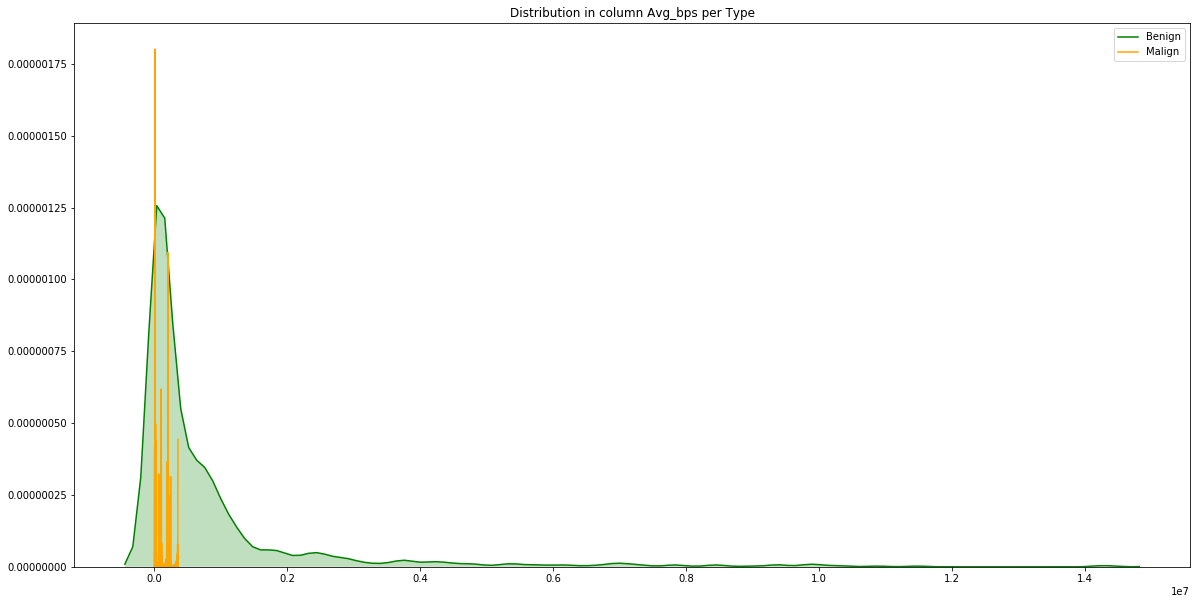

In [89]:
column = "Avg_bps"
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type" %column)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 0][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 1][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

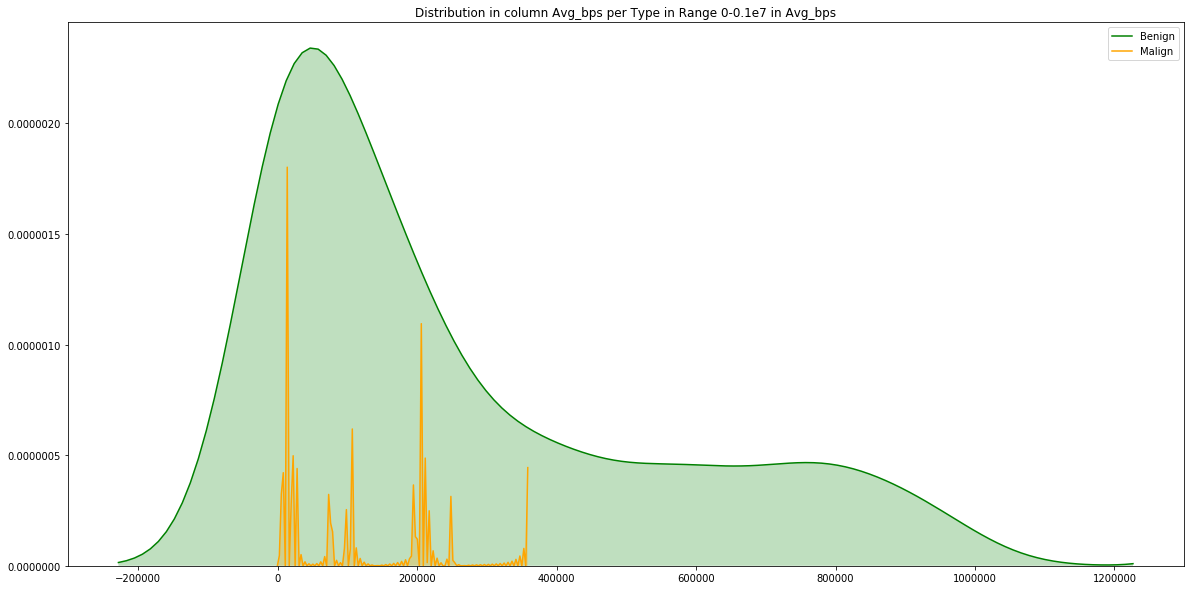

In [90]:
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type in Range 0-0.1e7 in Avg_bps" %column)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 0) & (dataframe_copy.Avg_bps < 0.1e7)][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 1) & (dataframe_copy.Avg_bps < 0.1e7)][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

#### 9.2 Avg_pps

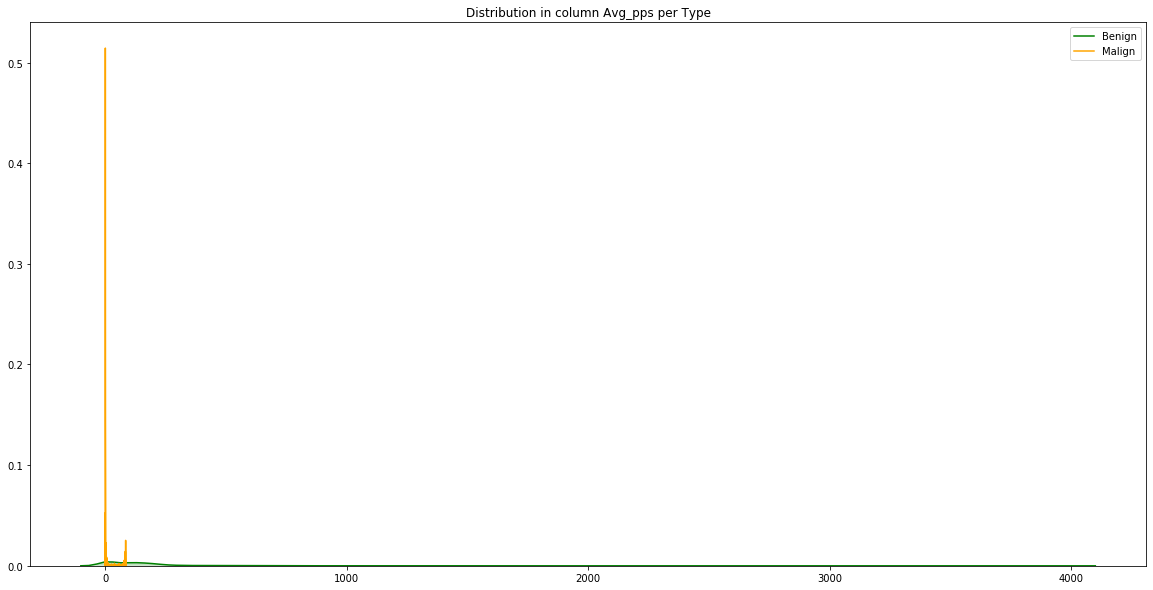

In [91]:
column = "Avg_pps"
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type" %column)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 0][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 1][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

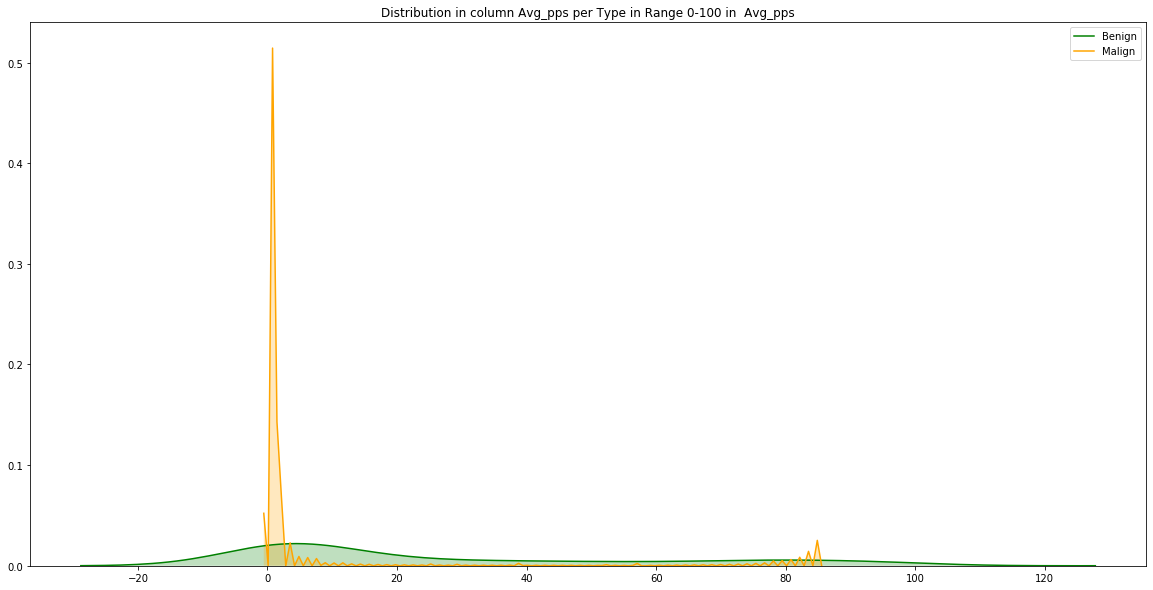

In [92]:
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type in Range 0-100 in  Avg_pps" %column)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 0) & (dataframe_copy.Avg_pps < 100)][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 1) & (dataframe_copy.Avg_pps < 100)][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

#### 9.3 Bytes

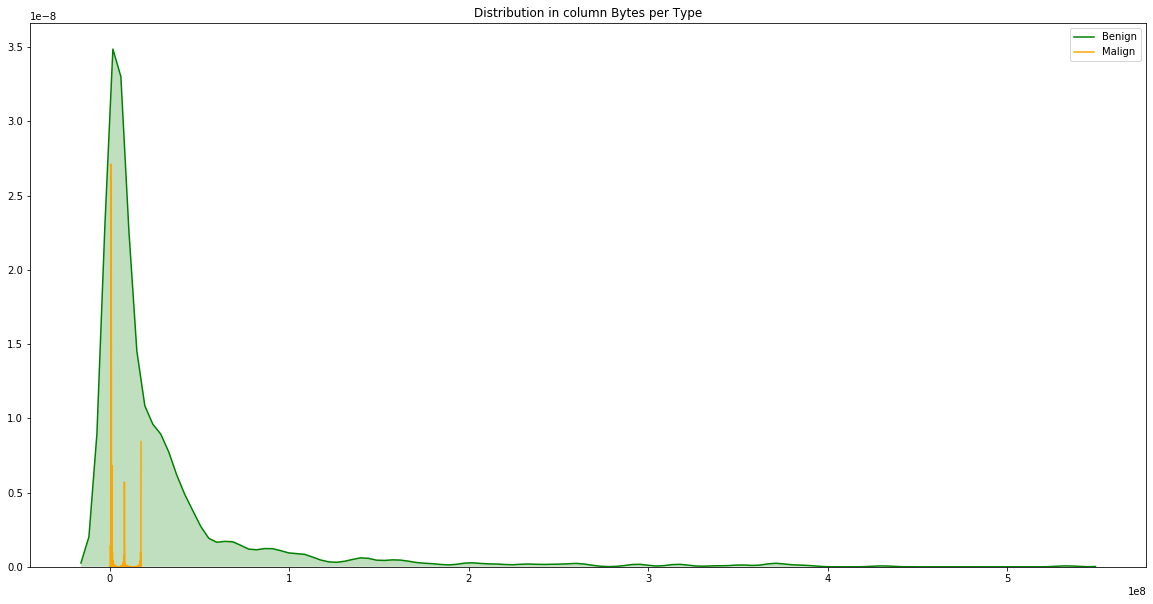

In [104]:
column = "Bytes"
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type" %column)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 0][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 1][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

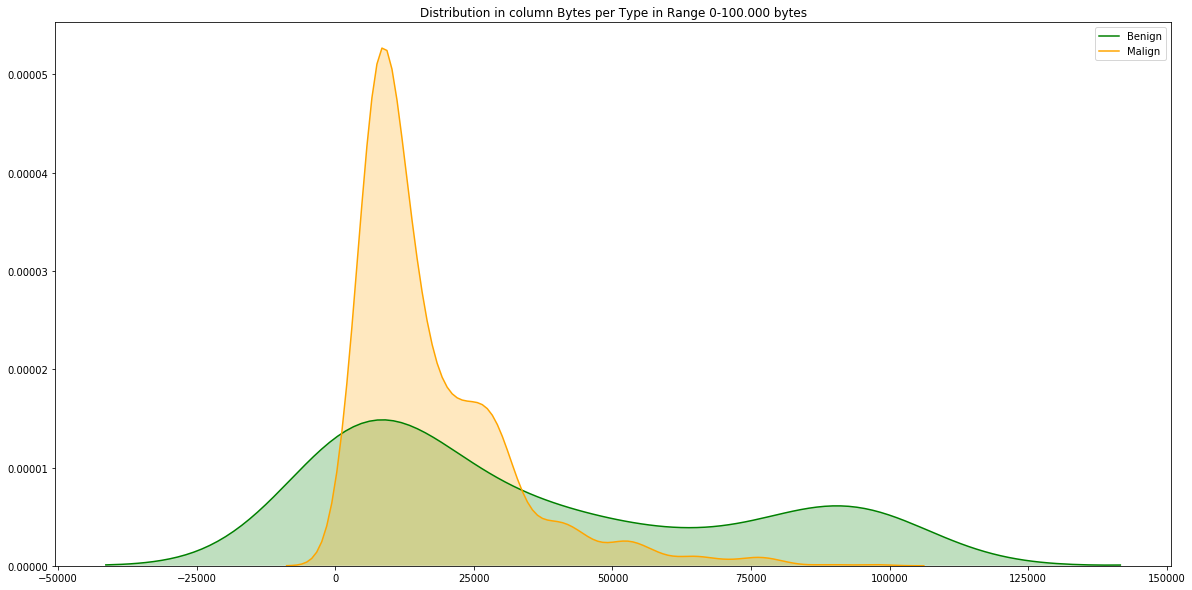

In [106]:
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type in Range 0-100.000 bytes" %column)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 0) & (dataframe_copy.Bytes < 100000)][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 1) & (dataframe_copy.Bytes < 100000)][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

#### 9.4 p2_ib

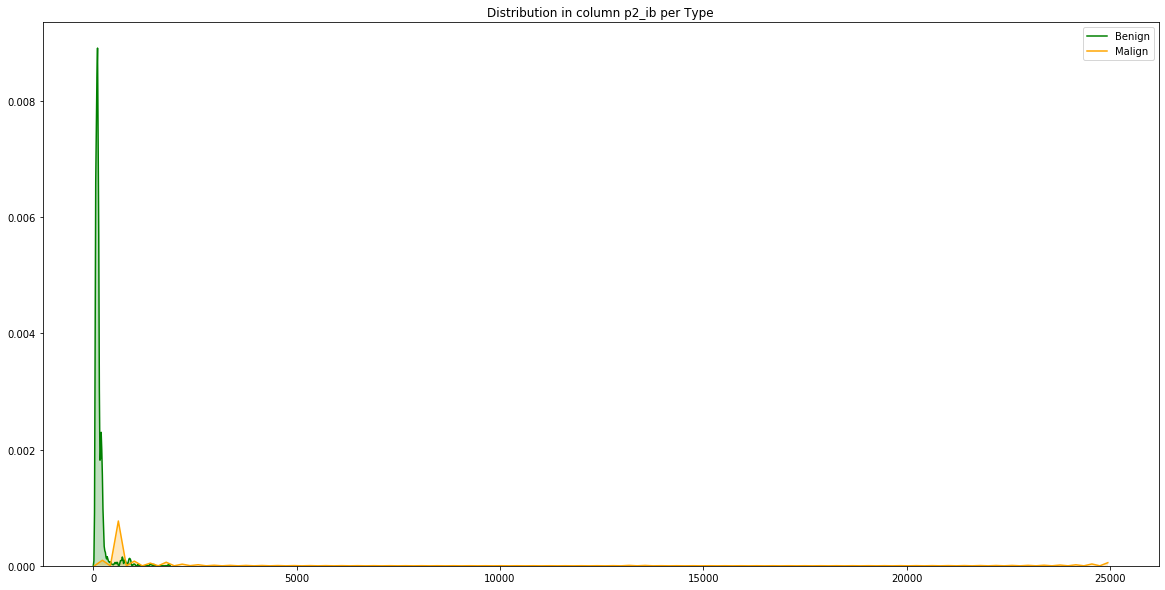

In [108]:
column = "p2_ib"
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type" %column)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 0][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 1][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

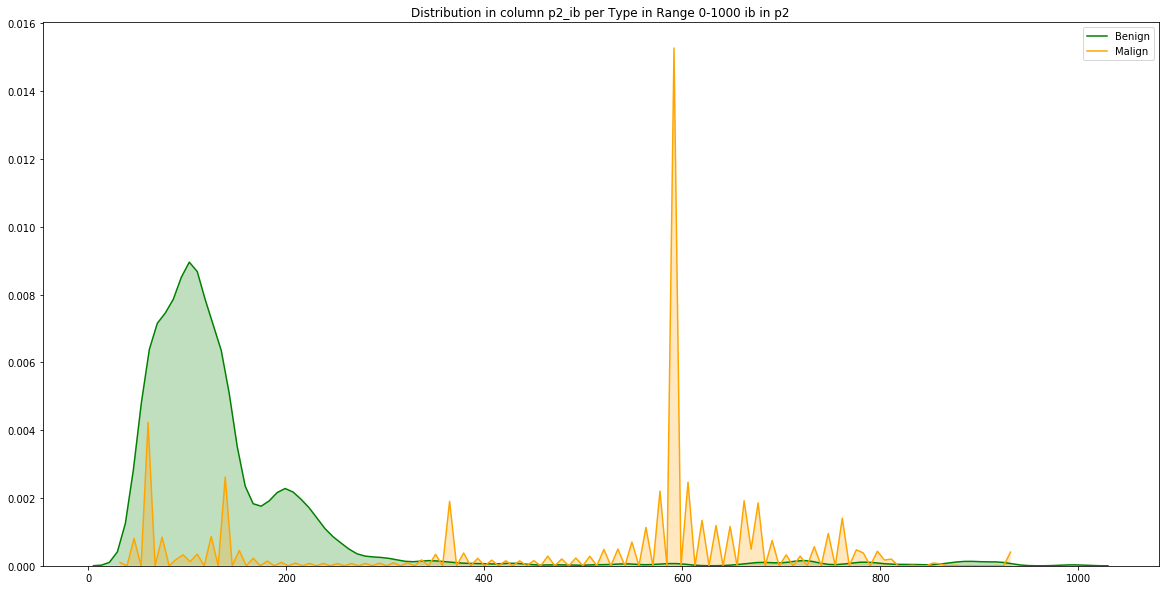

In [109]:
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type in Range 0-1000 ib in p2" %column)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 0) & (dataframe_copy.p2_ib < 1000)][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 1) & (dataframe_copy.p2_ib < 1000)][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

#### 9.5 number_sp

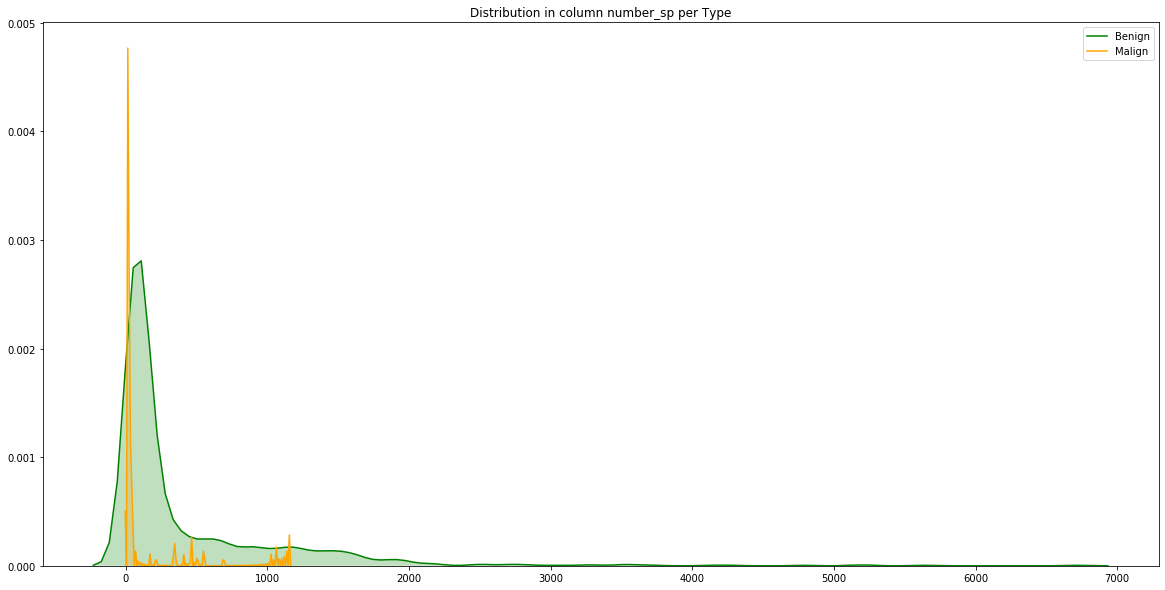

In [110]:
column = "number_sp"
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type" %column)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 0][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 1][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

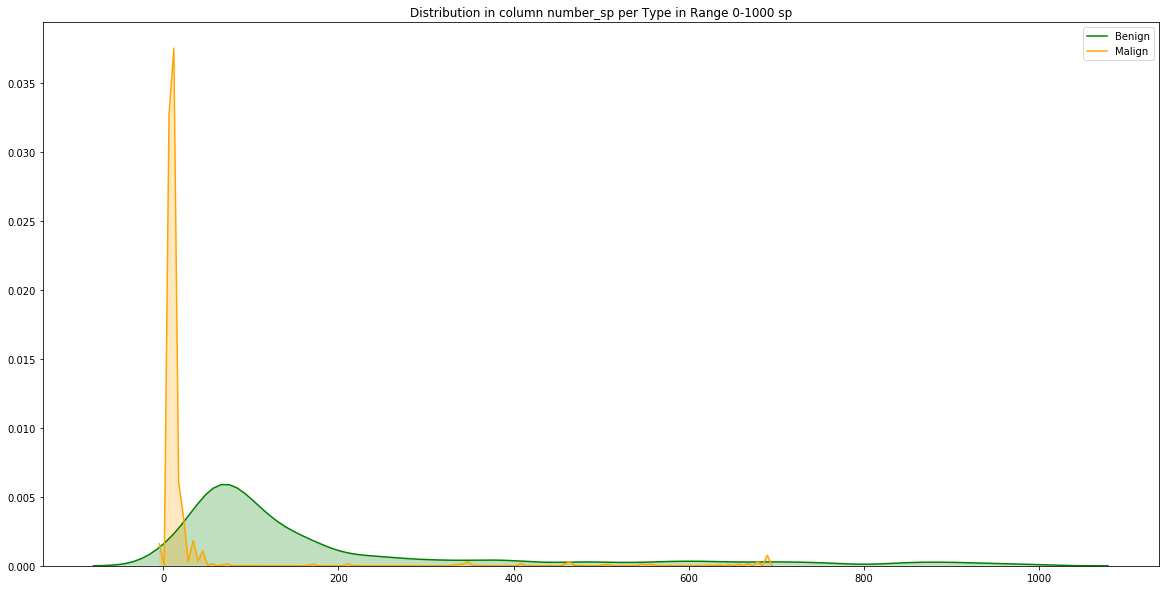

In [111]:
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type in Range 0-1000 sp" %column)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 0) & (dataframe_copy.number_sp < 1000)][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 1) & (dataframe_copy.number_sp < 1000)][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

#### 9.6 First_Protocol

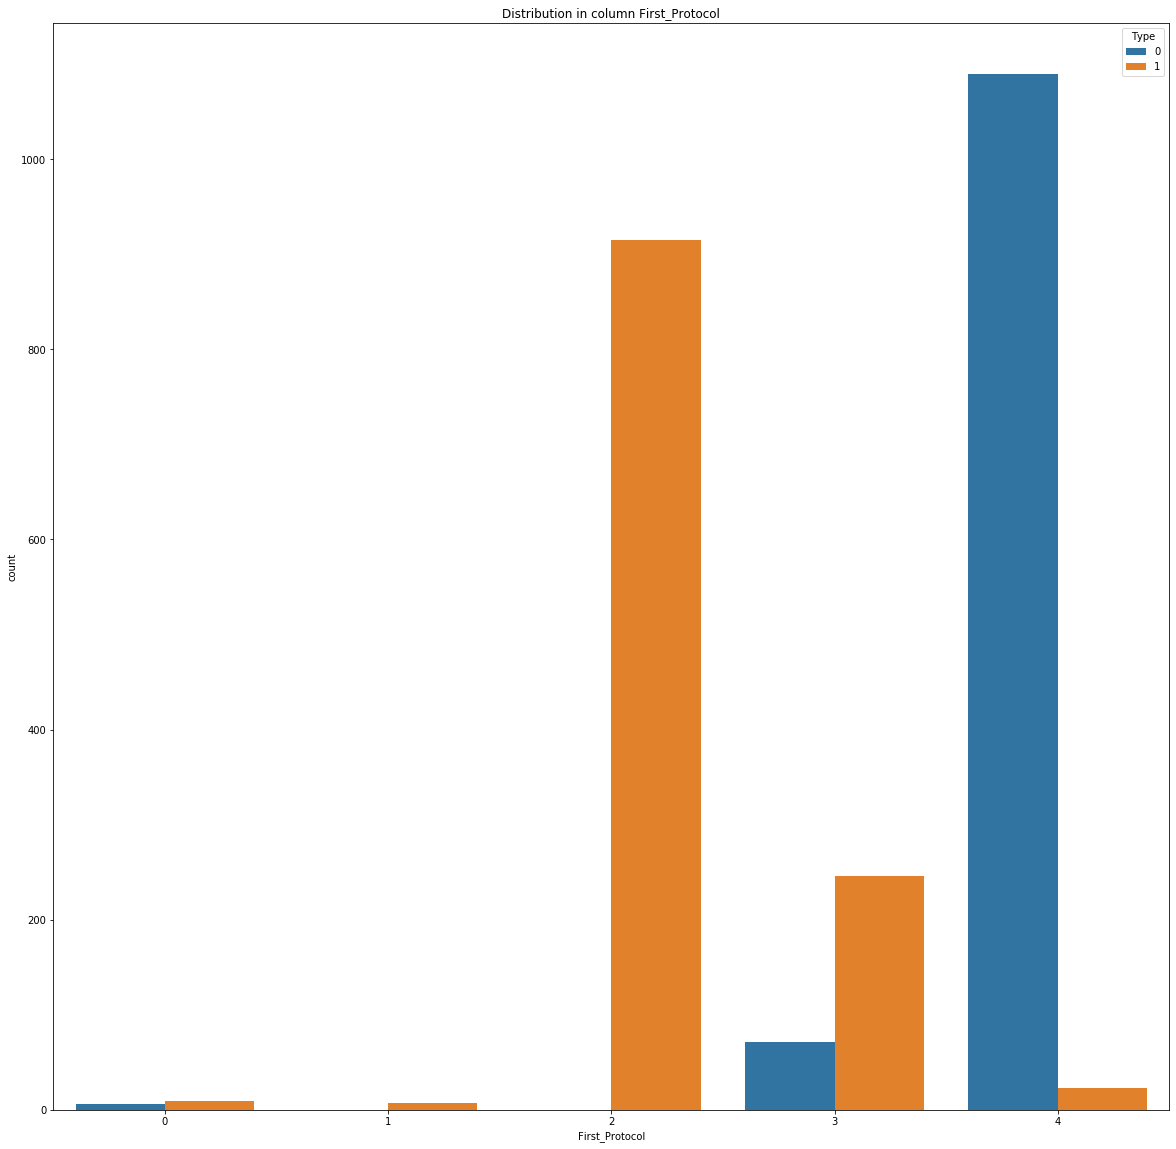

In [112]:
column = "First_Protocol"
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,20))
ax1.set_title("Distribution in column %s" %column)
sns.countplot(x=column, hue="Type",data=dataframe_copy[[column,"Type"]])

In [113]:
le_name_mapping_first_protocol

{'ICMP': 0, 'ICMP6': 1, 'None': 2, 'TCP': 3, 'UDP': 4}

#### 9.7 number_dp

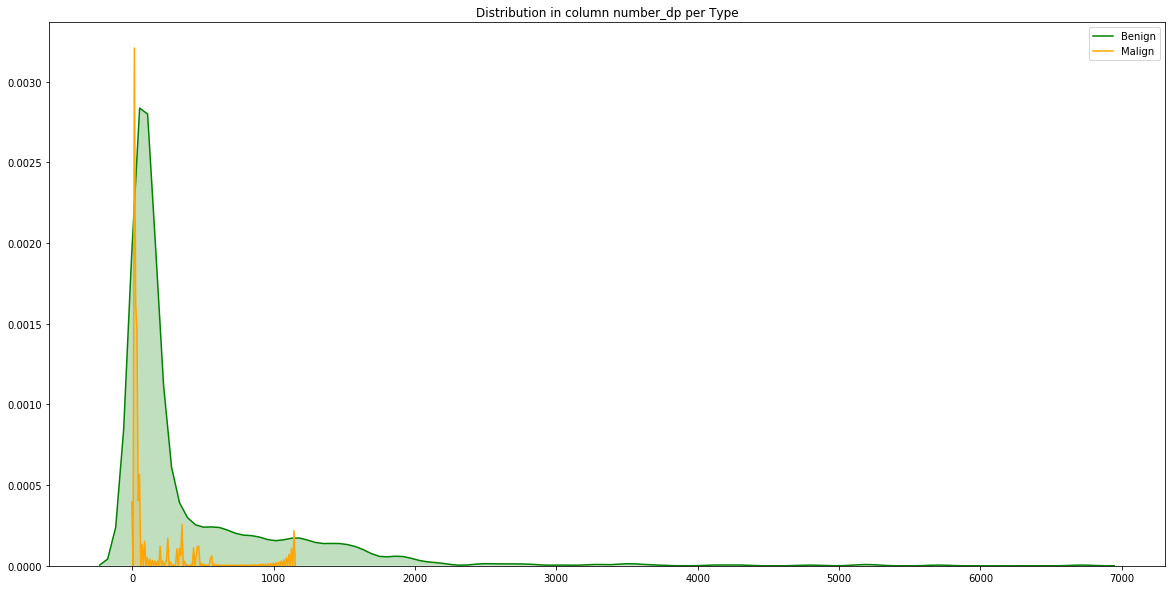

In [114]:
column = "number_dp"
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type" %column)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 0][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 1][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

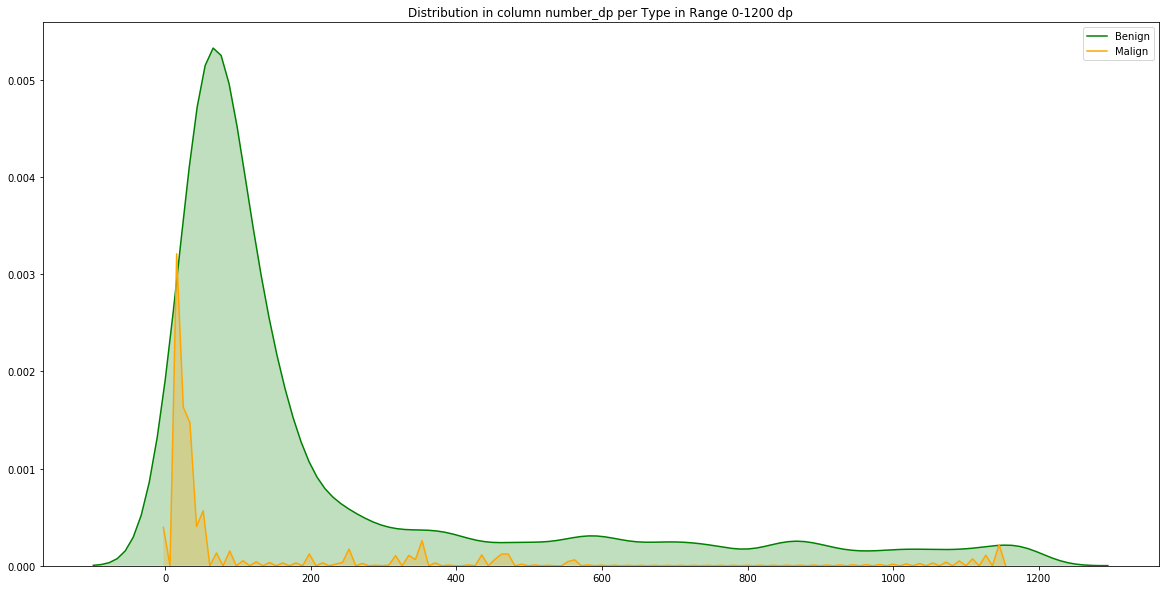

In [115]:
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type in Range 0-1200 dp" %column)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 0) & (dataframe_copy.number_dp < 1200)][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 1) & (dataframe_copy.number_dp < 1200)][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

#### 9.8 First_sp

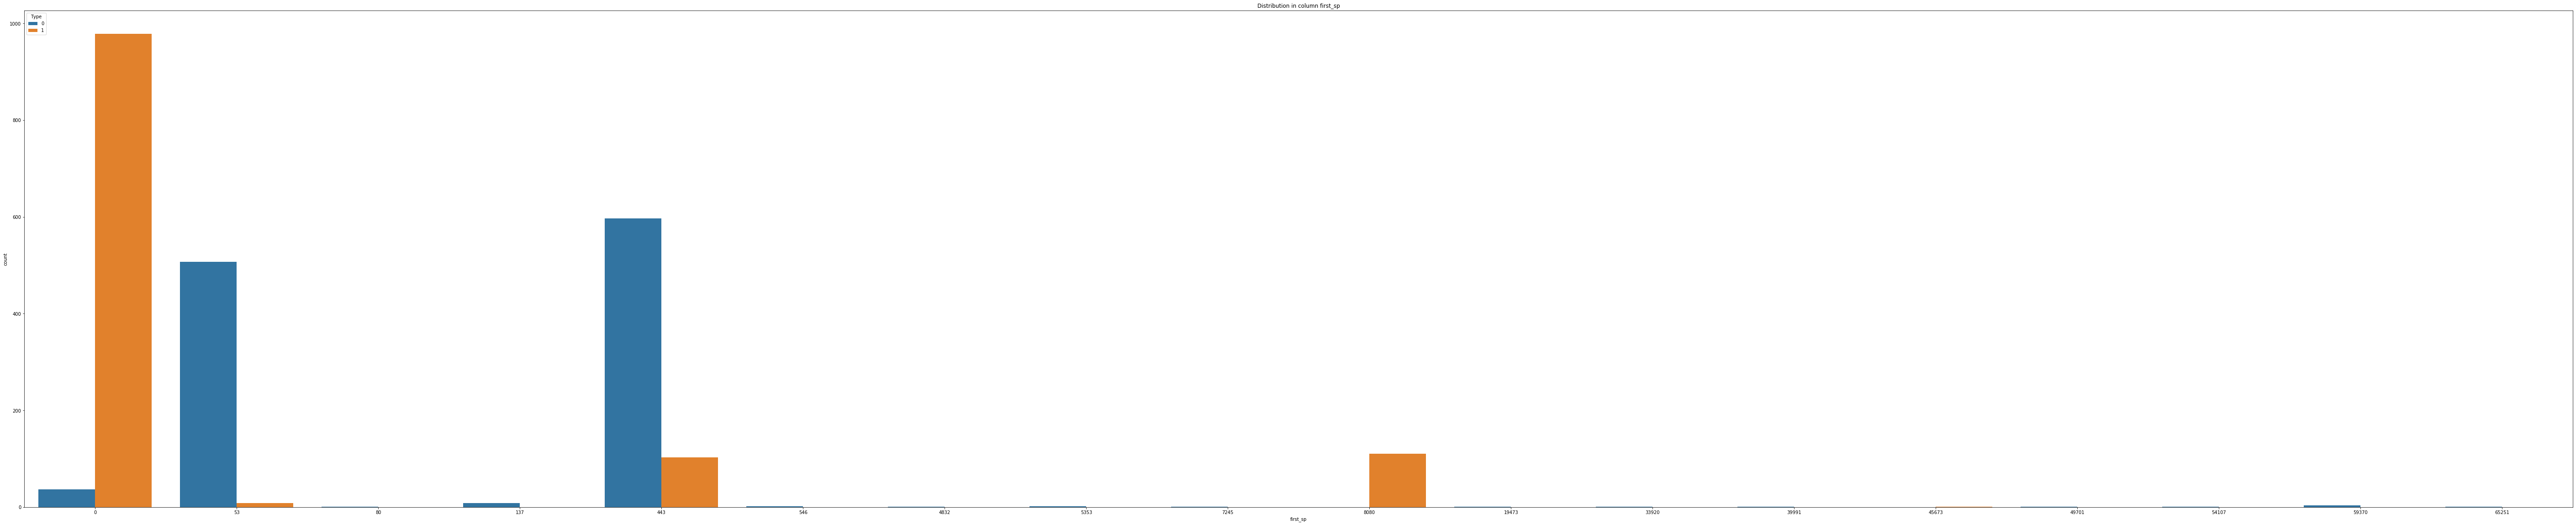

In [116]:
column = "first_sp"
fig, (ax1) = plt.subplots(ncols=1, figsize =(100,20))
ax1.set_title("Distribution in column %s" %column)
sns.countplot(x=column, hue="Type",data=dataframe_copy[[column,"Type"]])

#### 9.9 Duration

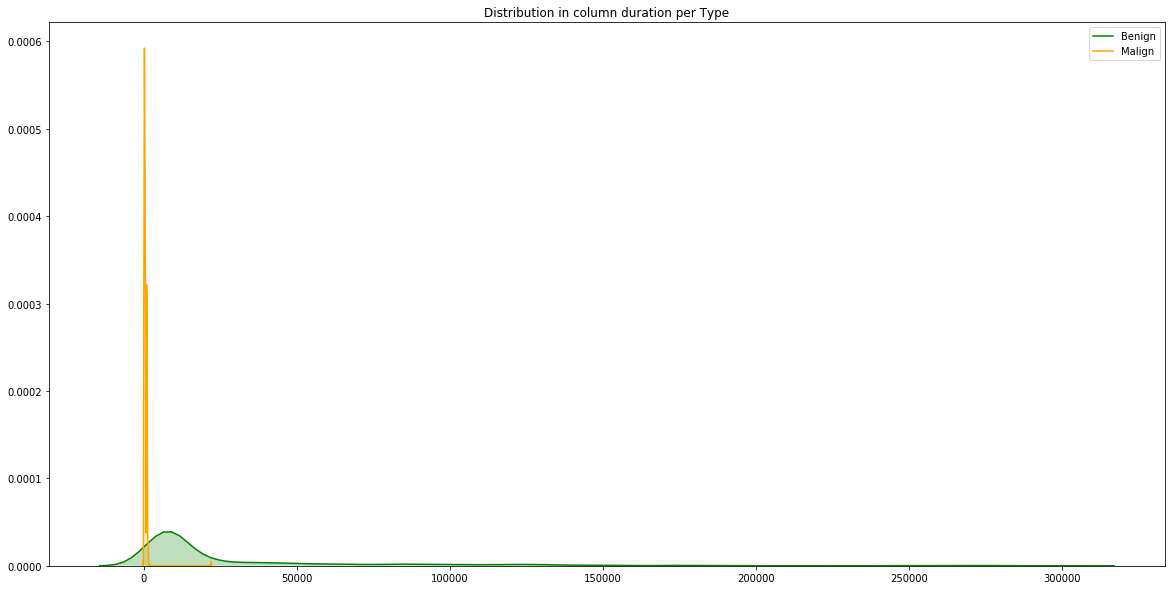

In [117]:
column = "duration"
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type" %column)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 0][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 1][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

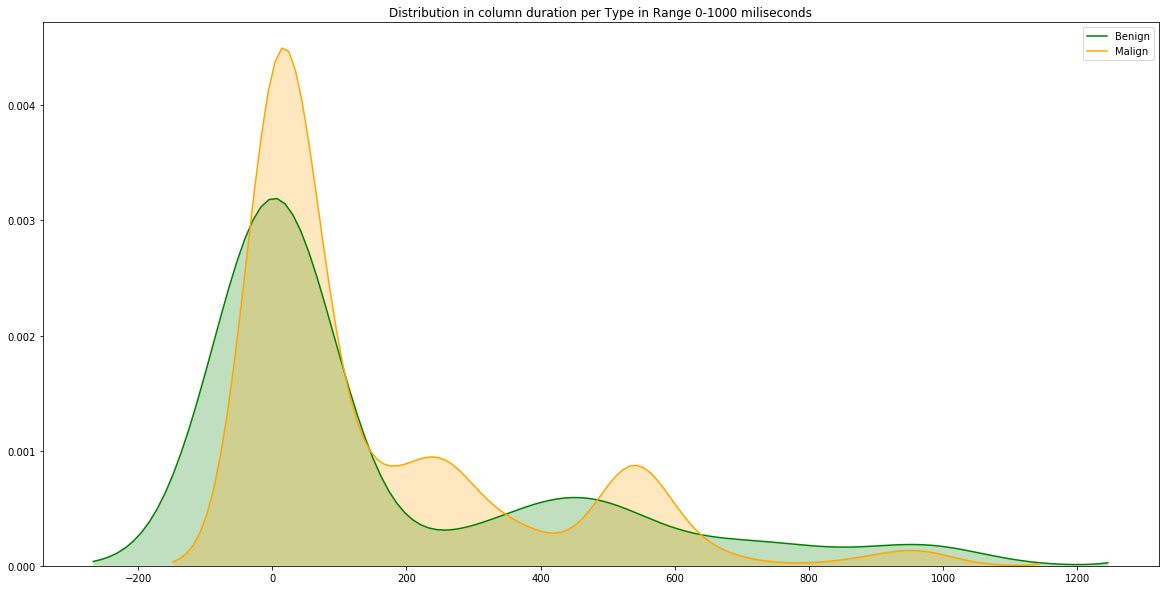

In [119]:
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type in Range 0-1000 miliseconds" %column)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 0) & (dataframe_copy.duration < 1000)][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 1) & (dataframe_copy.duration < 1000)][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

#### 9.10 p1_ib

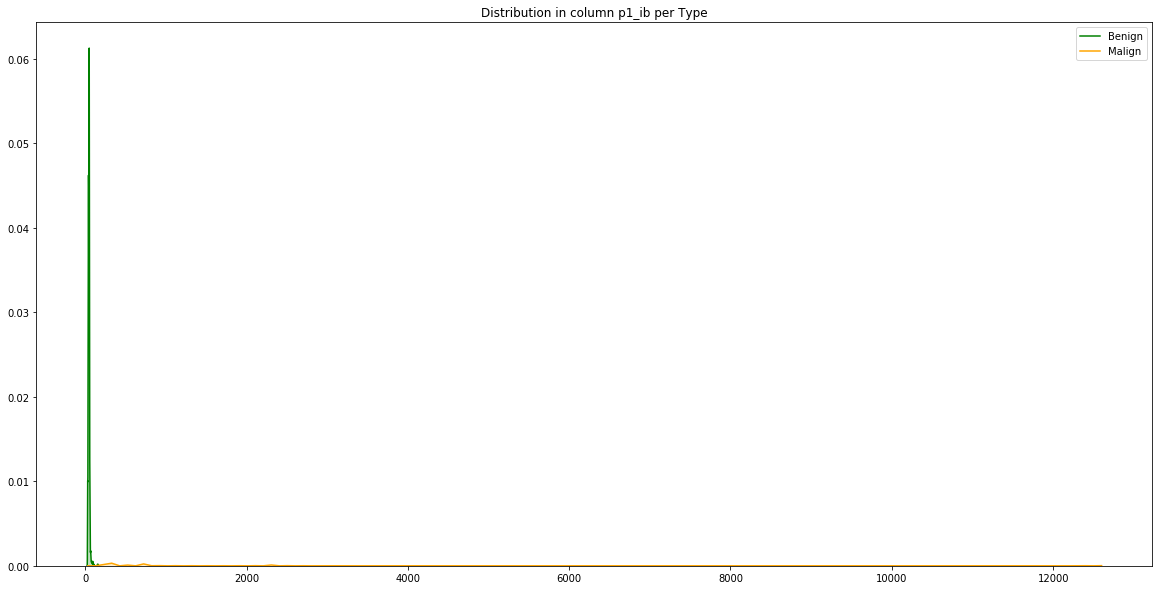

In [120]:
column = "p1_ib"
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type" %column)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 0][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 1][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

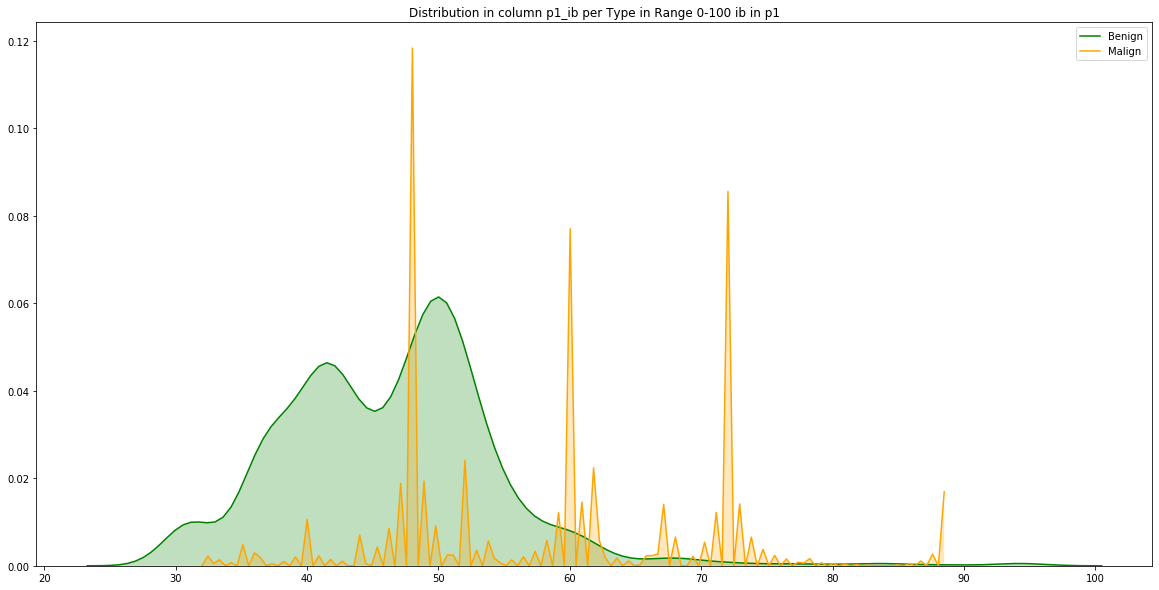

In [121]:
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type in Range 0-100 ib in p1" %column)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 0) & (dataframe_copy.p1_ib < 100)][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 1) & (dataframe_copy.p1_ib < 100)][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

#### 9.11 Netflows

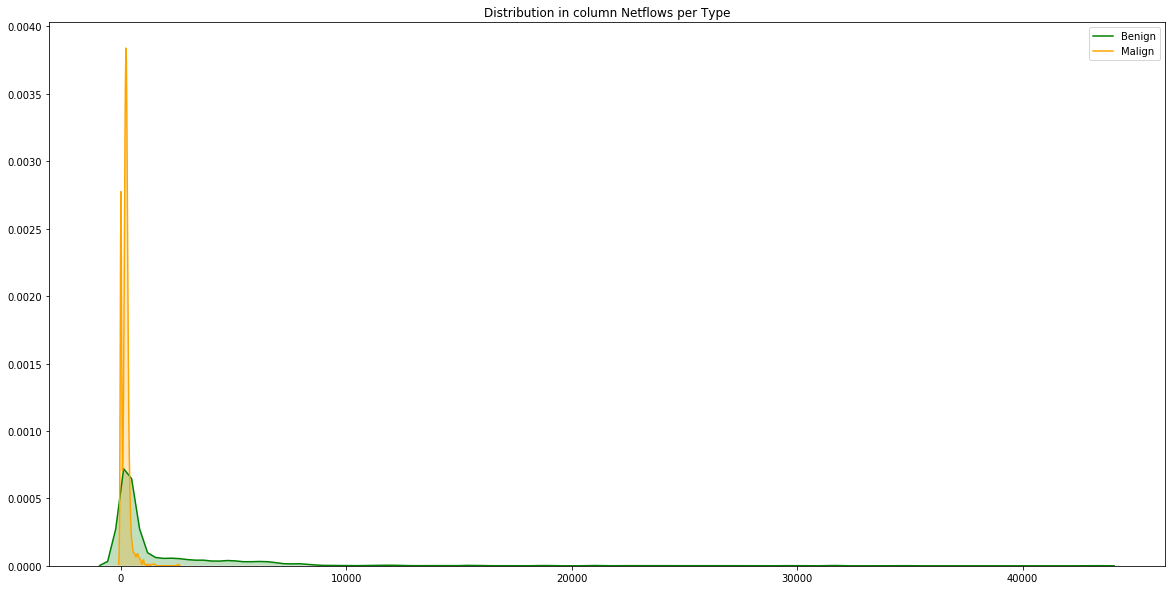

In [122]:
column = "Netflows"
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type" %column)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 0][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 1][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

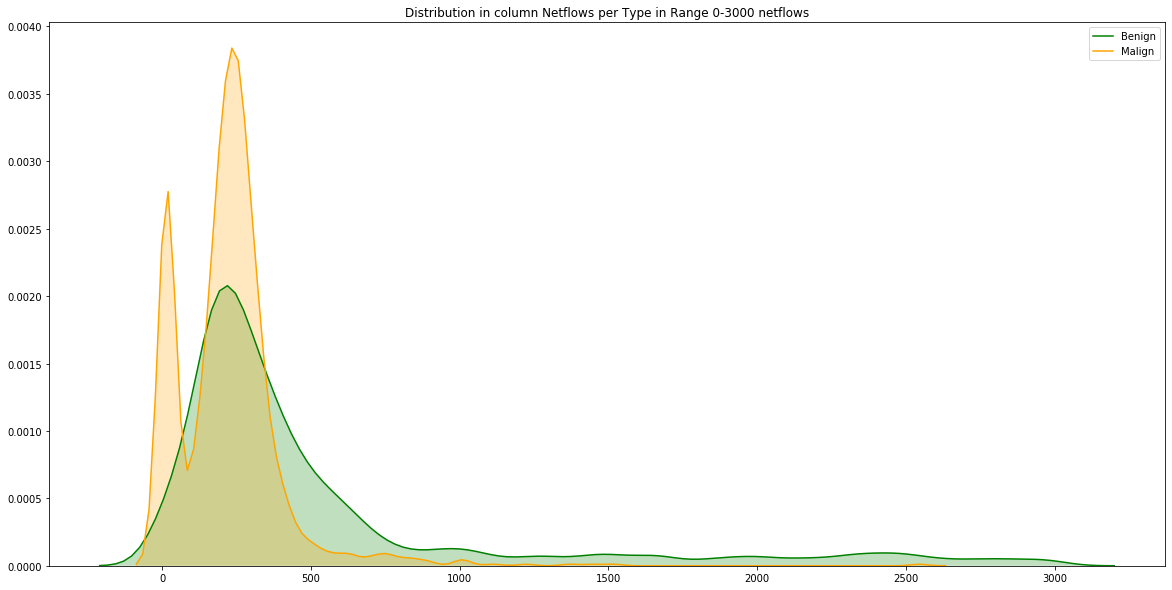

In [124]:
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type in Range 0-3000 netflows" %column)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 0) & (dataframe_copy.Netflows < 3000)][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 1) & (dataframe_copy.Netflows < 3000)][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

#### 9.12 p3_ib

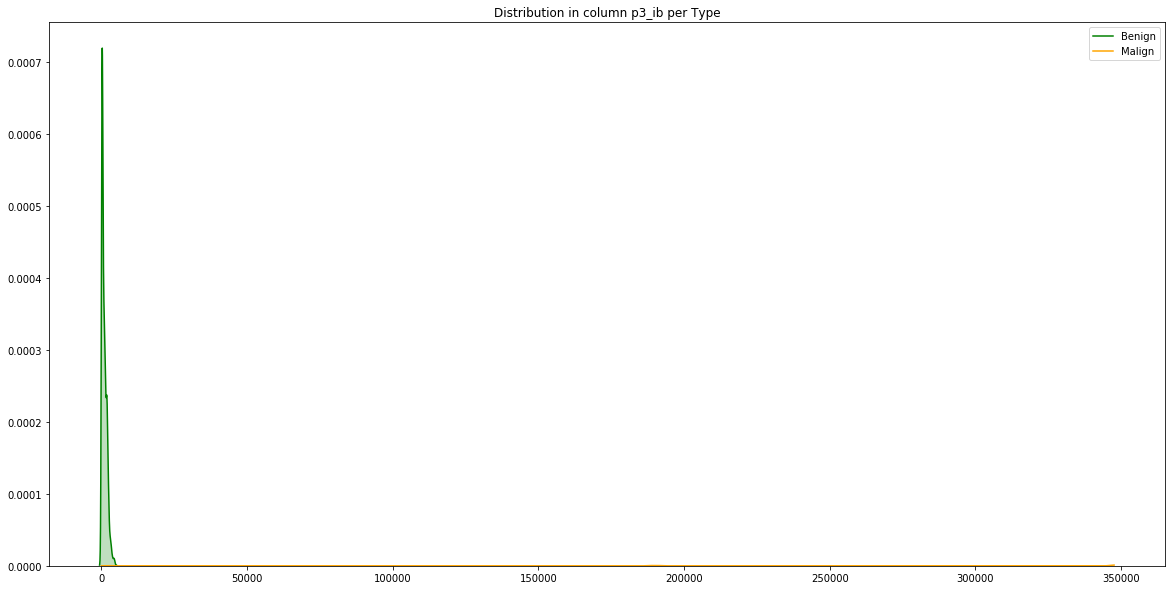

In [125]:
column = "p3_ib"
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type" %column)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 0][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 1][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

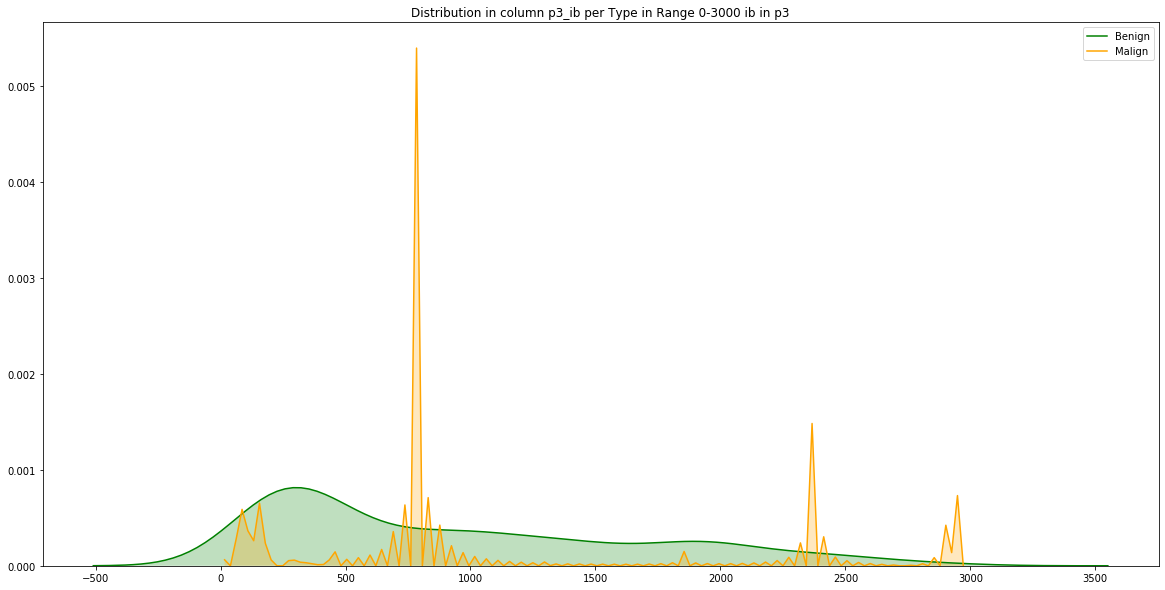

In [126]:
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type in Range 0-3000 ib in p3" %column)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 0) & (dataframe_copy.p3_ib < 3000)][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 1) & (dataframe_copy.p3_ib < 3000)][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

#### 9.13 p3_d

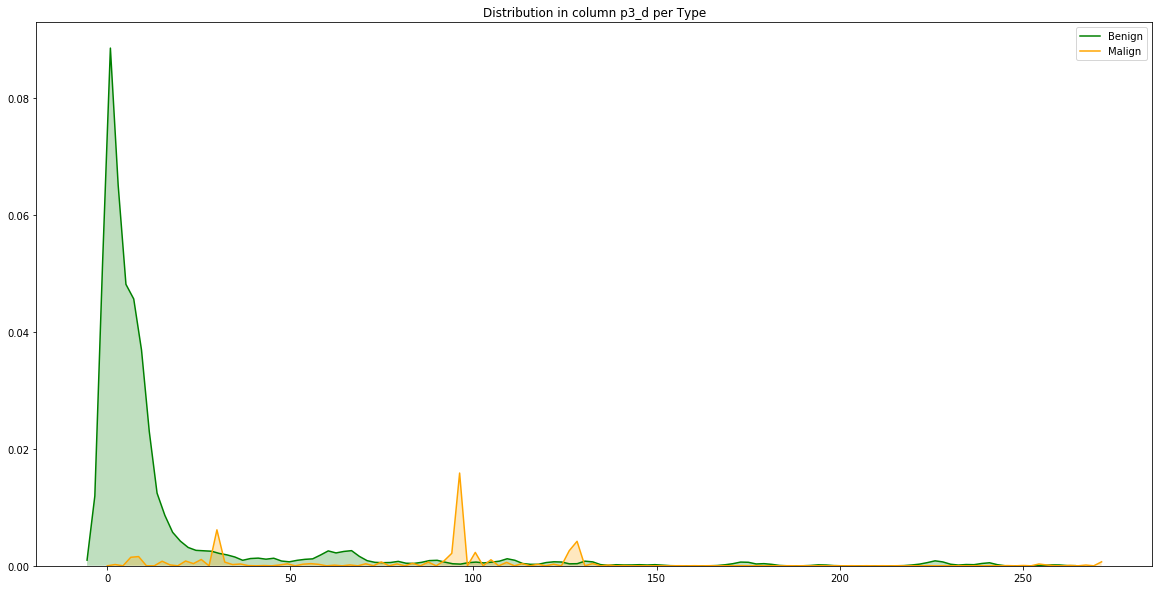

In [127]:
column = "p3_d"
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type" %column)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 0][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[dataframe_copy.Type == 1][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

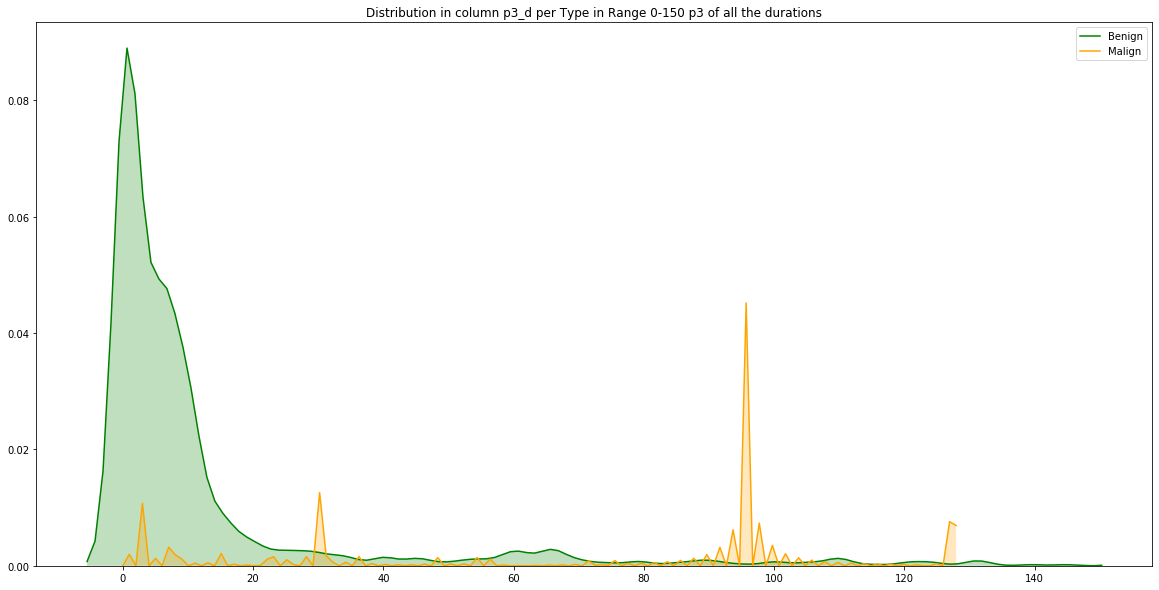

In [128]:
fig, (ax1) = plt.subplots(ncols=1, figsize =(20,10))
ax1.set_title("Distribution in column %s per Type in Range 0-150 p3 of all the durations" %column)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 0) & (dataframe_copy.p3_d < 150)][column], color="green", shade=True)
sns.kdeplot(dataframe_copy[(dataframe_copy.Type == 1) & (dataframe_copy.p3_d < 150)][column], color="orange", shade=True)
plt.legend(['Benign', 'Malign'])

## References

1. https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029
2. https://www.dataquest.io/blog/machine-learning-preparing-data/
3. https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
4. https://stackoverflow.com/questions/55466081/how-to-calculate-feature-importance-in-each-models-of-cross-validation-in-sklear